In [38]:
import os
import json

from roboflow import Roboflow
from dotenv import load_dotenv
from datasets import Dataset
from pycocotools.coco import COCO
from PIL import Image, ImageDraw, ImageFont
from huggingface_hub import login, upload_folder
import matplotlib.pyplot as plt

load_dotenv()

True

In [32]:
rf = Roboflow(api_key=os.getenv("ROBOFLOW_API_KEY"))

project = rf.workspace("galaxy-detection-nvdc5") \
    .project("galaxy-detection-w-only-large-scope-images-9s3ys")
    
version = project.version(11)
dataset = version.download("coco", location="./../data", overwrite=True)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ./../data in coco:: 100%|██████████| 1214/1214 [00:00<00:00, 4907.28it/s]


In [33]:
coco = COCO("./../data/train/_annotations.coco.json")

loading annotations into memory...
Done (t=2.07s)
creating index...
index created!


In [34]:
images = []
annotations = []

for image_id in coco.getImgIds():
    image_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join("./../data/train", image_info['file_name'])
    images.append({"image_id": image_id, "image_path": image_path})

    # Armazene anotações para esta imagem em uma lista
    ann_ids = coco.getAnnIds(imgIds=image_id)
    image_annotations = []
    for ann_id in ann_ids:
        ann = coco.loadAnns(ann_id)[0]
        image_annotations.append({
            "category_id": ann['category_id'],
            "bbox": ann['bbox']
        })
    
    # Adicione a lista de anotações da imagem à lista principal
    annotations.append(image_annotations) 

In [35]:
hf_dataset = Dataset.from_dict({
    "image_id": [img["image_id"] for img in images],
    "image_path": [img["image_path"] for img in images],
    "annotations": annotations,  
})

In [37]:
hf_dataset.save_to_disk("./../data/")

Saving the dataset (0/1 shards):   0%|          | 0/1210 [00:00<?, ? examples/s]

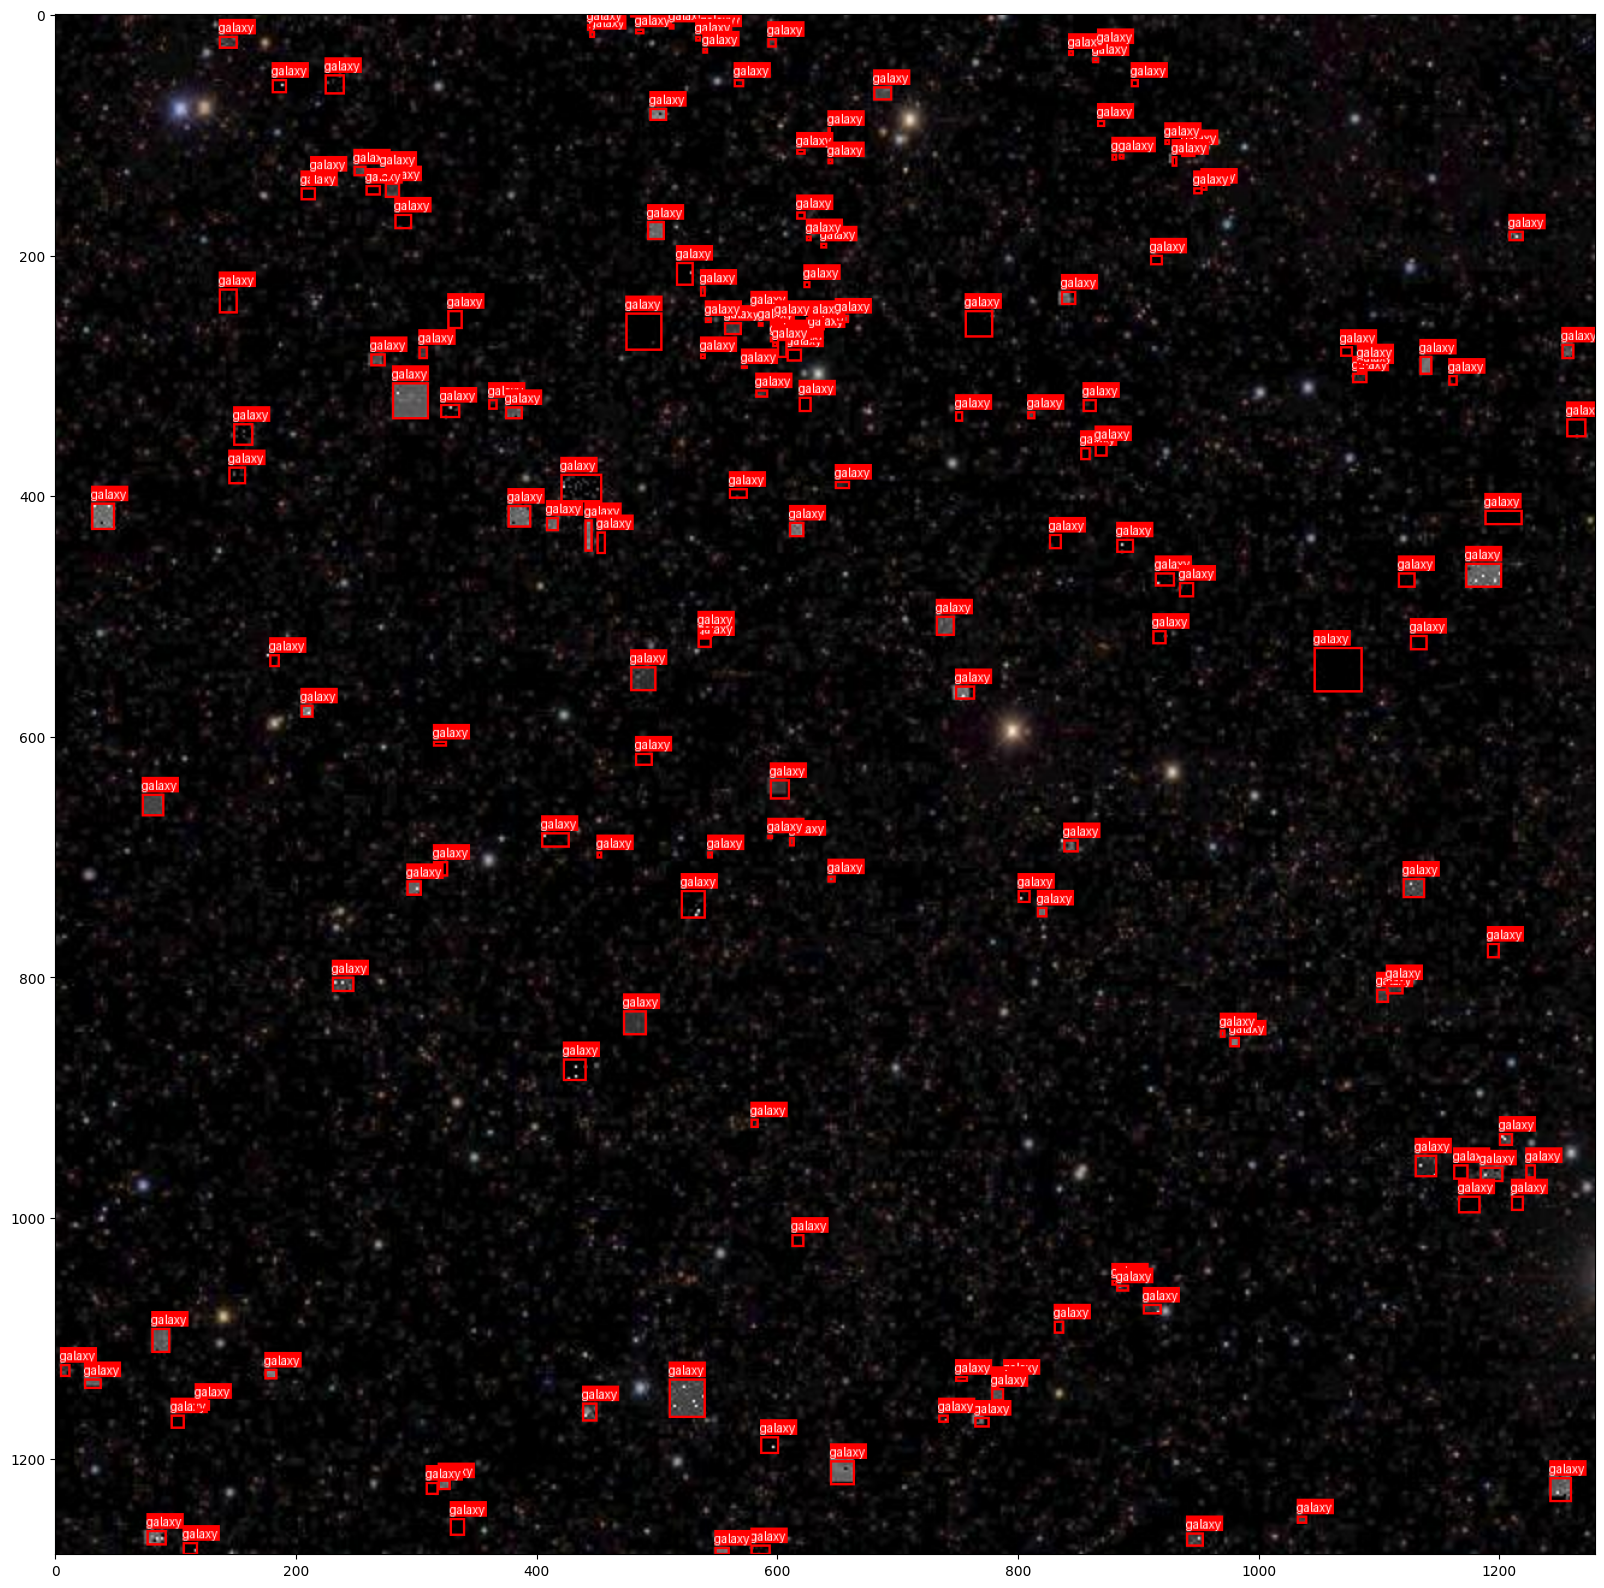

In [36]:
category_names = {
    0: "galaxy",
    1: "Galaxy",
    2: "Star",
    3: "defect",
    4: "galaxy",
    5: "stars-galaxies"
}

def visualize_image_and_annotations(example):
    """Carrega, aumenta, desenha as anotações e mostra uma imagem."""
    image = Image.open(example["image_path"])
    
    # Aumenta a imagem
    image = image.resize((image.width * 2, image.height * 2)) # Dobra o tamanho
    draw = ImageDraw.Draw(image)
    
    # Define a fonte para o texto da categoria
    font = ImageFont.load_default() # Você pode carregar uma fonte personalizada aqui

    for annotation in example['annotations']:
        bbox = annotation['bbox']
        
        # Ajusta as coordenadas do bbox para o tamanho da imagem aumentada
        bbox = [coord * 2 for coord in bbox]
        
        draw.rectangle([(bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3])], outline="red", width=2)
        
        # Adiciona o nome da categoria acima do bbox
        category_name = category_names.get(annotation['category_id'], "Desconhecido")
        text_width, text_height = font.getbbox(category_name)[2:4]
        draw.rectangle([(bbox[0], bbox[1] - text_height - 2), (bbox[0] + text_width, bbox[1] - 2)], fill="red")
        draw.text((bbox[0], bbox[1] - text_height - 1), category_name, fill="white", font=font)
    plt.figure(figsize=(20, 20)) 
    plt.imshow(image)
    plt.show()

# Visualize a primeira imagem do dataset
example = hf_dataset[700] 
visualize_image_and_annotations(example) 

In [45]:
login(token=os.getenv('HF_TOKEN'))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /home/rafael/.cache/huggingface/token
Login successful


In [46]:
upload_folder(
    folder_path="./../data/",  
    repo_id="rajora/galaxy-detection-dataset",  
    repo_type="dataset"
)

100_jpg.rf.10a91d2fab230bfe7b338e0c20da5a60.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

100_jpg.rf.1b0abc70c101b766aa36343585407df8.jpg:   0%|          | 0.00/76.3k [00:00<?, ?B/s]

100_jpg.rf.246a95a5a4c4d96dec18eb38424eeaef.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

100_jpg.rf.0728f39e5a2ed2bcc69a2c79accf6521.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

data-00000-of-00001.arrow:   0%|          | 0.00/8.07M [00:00<?, ?B/s]

Upload 1211 LFS files:   0%|          | 0/1211 [00:00<?, ?it/s]

100_jpg.rf.2e74898961f3341db6dee567cddcd9dd.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

100_jpg.rf.30832336aa61b86195d195c6f2cf6be9.jpg:   0%|          | 0.00/76.4k [00:00<?, ?B/s]

100_jpg.rf.3536e3acd9bf326d940edcc7a3577814.jpg:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

100_jpg.rf.454dffed841143988b1769f6186d6a5c.jpg:   0%|          | 0.00/63.3k [00:00<?, ?B/s]

100_jpg.rf.4b4ebd874762c3317606c2dff2d8cdc8.jpg:   0%|          | 0.00/45.9k [00:00<?, ?B/s]

100_jpg.rf.4ea10cb1f2a07112aee35b1c8bb79184.jpg:   0%|          | 0.00/67.4k [00:00<?, ?B/s]

100_jpg.rf.4eb8a273d0bf5109886d2132f9cd26cd.jpg:   0%|          | 0.00/34.3k [00:00<?, ?B/s]

100_jpg.rf.51e44e6633cb0c545743e92879e12ba8.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

100_jpg.rf.5847e4b9db37d80ac082d563afa92126.jpg:   0%|          | 0.00/68.3k [00:00<?, ?B/s]

100_jpg.rf.5a4cf31699f9c70c0b0a45b870fd5235.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

100_jpg.rf.60d1d2036b0ae7b50805761b1ed0039c.jpg:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

100_jpg.rf.6901e16987fe92ca11b3cf2160bf7271.jpg:   0%|          | 0.00/48.0k [00:00<?, ?B/s]

100_jpg.rf.6e310e029c126de192d9f1b68344419c.jpg:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

100_jpg.rf.70123aa21d7488a46c82d276d9b8d2a2.jpg:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

100_jpg.rf.79da3669b9062ec0e76b05047cfba67b.jpg:   0%|          | 0.00/73.6k [00:00<?, ?B/s]

100_jpg.rf.7babdf4dc7f9882a7c33dfe0299dab68.jpg:   0%|          | 0.00/78.1k [00:00<?, ?B/s]

100_jpg.rf.7bffc2f31f401446d176e0e8c295933e.jpg:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

100_jpg.rf.9734dfc9af4622984dc728bcb17578e2.jpg:   0%|          | 0.00/47.9k [00:00<?, ?B/s]

100_jpg.rf.9c62956f1f9ae9ddeb722bb34c0a4e6e.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

100_jpg.rf.af6f7bbb10e7b25735a60422d8131250.jpg:   0%|          | 0.00/78.4k [00:00<?, ?B/s]

100_jpg.rf.b5a9e687a92ad24ac5310b5b09583a5f.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

100_jpg.rf.b5c7fb041d698a008f16239d12c5da8b.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

100_jpg.rf.b9f25f332a80b03da0839a95e011631c.jpg:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

100_jpg.rf.bf053da5577745a552028883de1889d9.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

100_jpg.rf.c0239ceba5fae5df275d4fe653295f16.jpg:   0%|          | 0.00/73.0k [00:00<?, ?B/s]

100_jpg.rf.d04074b28f6d62c8ea33f2ec2718386b.jpg:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

100_jpg.rf.d4e0d227c82e0d0e17b482a0cf14111d.jpg:   0%|          | 0.00/70.9k [00:00<?, ?B/s]

100_jpg.rf.d611131975ee5208860c5a423244dcb0.jpg:   0%|          | 0.00/53.4k [00:00<?, ?B/s]

100_jpg.rf.d9860ce5521767f8f29a2cc9df37682b.jpg:   0%|          | 0.00/34.3k [00:00<?, ?B/s]

100_jpg.rf.dd379830ef07619e4055a24e5e39cd70.jpg:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

100_jpg.rf.dd7e0057690f81b988960cd733a9e3d8.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

100_jpg.rf.eb83c9337bcc256a1a435175ac907009.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

100_jpg.rf.eb91e8317c0a8ffeebf8457b900699bc.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

100_jpg.rf.f5d7bc7428afb191b11d4b2cedd45e5c.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

100_jpg.rf.fbd7a88e560bb7f363cd59c8f440c547.jpg:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

101_jpg.rf.00213d10ee0a61b17d0f98585f568c1f.jpg:   0%|          | 0.00/76.1k [00:00<?, ?B/s]

101_jpg.rf.0b7c22bef7be911e58b77037d960ec28.jpg:   0%|          | 0.00/80.1k [00:00<?, ?B/s]

101_jpg.rf.0ee0a963dd43f7992e25fbd936dcd881.jpg:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

101_jpg.rf.12356e7262a3c3485e31fb2c8202ee6c.jpg:   0%|          | 0.00/52.9k [00:00<?, ?B/s]

101_jpg.rf.241618af6b3111b9ffdf9da14145aa45.jpg:   0%|          | 0.00/80.9k [00:00<?, ?B/s]

101_jpg.rf.263f3808b81201de6e474900903086ed.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

101_jpg.rf.2b47d71437866d5553033ff718ccac09.jpg:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

101_jpg.rf.349e4328c9911f4abd9bf274869bc732.jpg:   0%|          | 0.00/81.0k [00:00<?, ?B/s]

101_jpg.rf.34bfad4ec799681ce8dafe8c5bfd7634.jpg:   0%|          | 0.00/52.5k [00:00<?, ?B/s]

101_jpg.rf.3562046d02c00e42778e159513cf688f.jpg:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

101_jpg.rf.3a24f696e574d1e88dd30058d34db007.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

101_jpg.rf.41b826032aac5c058732907d36ea02d5.jpg:   0%|          | 0.00/80.0k [00:00<?, ?B/s]

101_jpg.rf.421b3da007b87e4ee0ddada3905ebc84.jpg:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

101_jpg.rf.442050bb0a584704f50bca4f898a638b.jpg:   0%|          | 0.00/81.0k [00:00<?, ?B/s]

101_jpg.rf.47274549b92c4d3d47c9c8ee7c211b1d.jpg:   0%|          | 0.00/59.4k [00:00<?, ?B/s]

101_jpg.rf.47bcf2f688068497e15d340a161a2e9e.jpg:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

101_jpg.rf.491787ee3b3dd03ed3dbe630a601f5e2.jpg:   0%|          | 0.00/38.8k [00:00<?, ?B/s]

101_jpg.rf.4b6d9868697f9acb29b6763f3905347f.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

101_jpg.rf.63879fd0257aac3ac852a7cb02c72200.jpg:   0%|          | 0.00/80.9k [00:00<?, ?B/s]

101_jpg.rf.6ff47f56a43e2e8fd0807e6864bb15f7.jpg:   0%|          | 0.00/80.9k [00:00<?, ?B/s]

101_jpg.rf.712b97d7f99389d420891b7da5bbd9b7.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

101_jpg.rf.72d7af16b7c56768aabf11612212aab0.jpg:   0%|          | 0.00/66.5k [00:00<?, ?B/s]

101_jpg.rf.768c5d537fbaf0fff3ec9effe4771fc1.jpg:   0%|          | 0.00/80.3k [00:00<?, ?B/s]

101_jpg.rf.7773f312eb4c950e09ebb5dc4a5386d8.jpg:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

101_jpg.rf.7e78fc995135806a06334af4244a76fd.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

101_jpg.rf.8293aa65531f3f08de961f673f5f59ee.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

101_jpg.rf.85ff245ae51713a2ab3133dde0c622e4.jpg:   0%|          | 0.00/9.90k [00:00<?, ?B/s]

101_jpg.rf.8baf85a71e0d76587bea6574d003d758.jpg:   0%|          | 0.00/53.7k [00:00<?, ?B/s]

101_jpg.rf.8d6c4ac0878facd5020a8172ab7010c7.jpg:   0%|          | 0.00/52.8k [00:00<?, ?B/s]

101_jpg.rf.96fe74db79ebf729f9773a6b90498af8.jpg:   0%|          | 0.00/40.4k [00:00<?, ?B/s]

101_jpg.rf.9e6c148966707f392d199eab3d0ff82e.jpg:   0%|          | 0.00/56.6k [00:00<?, ?B/s]

101_jpg.rf.a4af6d2f37978a7744289c4eeb597c77.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

101_jpg.rf.a444fb3c1870d2e4881371482bb1ac78.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

101_jpg.rf.a6e390978016d8167ee35721a3e0ff18.jpg:   0%|          | 0.00/11.7k [00:00<?, ?B/s]

101_jpg.rf.a789ff20afa14d7759a5638db943aebb.jpg:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

101_jpg.rf.a913b0c33c121768d6b9bd78d8253826.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

101_jpg.rf.ab9532f48c1a409c3876dbbffdf1dc57.jpg:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

101_jpg.rf.ad03c7cf3813ac893290f0efd4f6a8e6.jpg:   0%|          | 0.00/81.1k [00:00<?, ?B/s]

101_jpg.rf.b0fd302fe7855e585978b4ceec6cca58.jpg:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

101_jpg.rf.b25d5ae724cfd97534e796a6c37e8cfe.jpg:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

101_jpg.rf.c2aa05ca9355846cf96c196851f4c22b.jpg:   0%|          | 0.00/79.5k [00:00<?, ?B/s]

101_jpg.rf.d03567570e9135dedf17c9f29b5b8c43.jpg:   0%|          | 0.00/58.0k [00:00<?, ?B/s]

101_jpg.rf.d07f2f26b6ed7d5e0676fc14ed19678d.jpg:   0%|          | 0.00/80.7k [00:00<?, ?B/s]

101_jpg.rf.d3cf530a273efb8779e38fb2bfa6a0ea.jpg:   0%|          | 0.00/63.6k [00:00<?, ?B/s]

101_jpg.rf.d498217f2af471a8fca165e934515942.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

101_jpg.rf.d851e5200b0b5d1f382311deceeea33f.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

101_jpg.rf.db69943d736215df327642e4cb200ef0.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

101_jpg.rf.dea5be401c710e9c94835f90b1a1d7e9.jpg:   0%|          | 0.00/49.2k [00:00<?, ?B/s]

101_jpg.rf.e29fd3c2380d3e64b4d5957f8062ee74.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

101_jpg.rf.e3afd4d8230522a82bf49b8a80f6b4f4.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

101_jpg.rf.e42b7ce8567e882e056b506d6fa46e00.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

101_jpg.rf.e4773b50dcd103e244df5358b16ae7b1.jpg:   0%|          | 0.00/81.9k [00:00<?, ?B/s]

101_jpg.rf.ed619932d2d9c7fef8a52a5571dc13e7.jpg:   0%|          | 0.00/87.2k [00:00<?, ?B/s]

101_jpg.rf.f283cf33b74a7b6a4b61f90d69164c04.jpg:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

101_jpg.rf.f7ed4b2ee937d5eb0441fc9702554c3b.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

101_jpg.rf.f867a65e5dc492f1bfe43cb161a091ea.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

101_jpg.rf.fd32c81fc5dd71d9773e63a10992ed59.jpg:   0%|          | 0.00/82.0k [00:00<?, ?B/s]

102_jpg.rf.00c909641c2fe73599356fa74b6a922e.jpg:   0%|          | 0.00/31.0k [00:00<?, ?B/s]

102_jpg.rf.047ec2f272dc6a11b63d338717554181.jpg:   0%|          | 0.00/89.5k [00:00<?, ?B/s]

102_jpg.rf.0ee72ca3059fa12c3f7291058fc06179.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

102_jpg.rf.15095a82c71a78fd54a8f8a33ccd0e01.jpg:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

102_jpg.rf.16976dad5c8c3934158bf6194f1bb032.jpg:   0%|          | 0.00/46.9k [00:00<?, ?B/s]

102_jpg.rf.1ff643cfdcd68d0b594a51fedd31e689.jpg:   0%|          | 0.00/58.6k [00:00<?, ?B/s]

102_jpg.rf.265bf934fd16d89d0da83a4e76e48281.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

102_jpg.rf.39f326ad0ed4e632ae985837ab8e9e37.jpg:   0%|          | 0.00/30.8k [00:00<?, ?B/s]

102_jpg.rf.53fd46872ed06606282069cf5071375a.jpg:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

102_jpg.rf.5d34651e8441dbccbc7b4d5a7a3d8dd8.jpg:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

102_jpg.rf.6457f15d39767da43b4ec273caab9b49.jpg:   0%|          | 0.00/54.1k [00:00<?, ?B/s]

102_jpg.rf.60f29425c3335b62279dc1ed0a931dbf.jpg:   0%|          | 0.00/47.4k [00:00<?, ?B/s]

102_jpg.rf.647ee7954c4548b7edae160f906fdaa6.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

102_jpg.rf.64e91d9e62eded6f9552031709fe4d06.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

102_jpg.rf.6827cfcbe603f19bf56317b60f5d20b4.jpg:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

102_jpg.rf.6c4a3880641ed0db69437b507ba8db19.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

102_jpg.rf.6c610bae4a2428e3375f89c87677f0ed.jpg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

102_jpg.rf.707f9908cecea2cd7fbbb314708916af.jpg:   0%|          | 0.00/63.3k [00:00<?, ?B/s]

102_jpg.rf.75cead96bc957ebdfa7afb03a45db364.jpg:   0%|          | 0.00/49.2k [00:00<?, ?B/s]

102_jpg.rf.7cf9c51c62a5cb61feb2b93d823d0e43.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

102_jpg.rf.7d51385f6c038267cabba6fbeec3ad32.jpg:   0%|          | 0.00/44.9k [00:00<?, ?B/s]

102_jpg.rf.8308d0c66f844898558e4d91b4e79756.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

102_jpg.rf.894bdda356c144f959c1db9793063e7d.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

102_jpg.rf.98397c8d4f85d81345e6dc54566b7f81.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

102_jpg.rf.9de0d8a79afb9fc634503d4121a73912.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

102_jpg.rf.aba4078ce2ae8d9207b4c32328ae3c77.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

102_jpg.rf.b1d3d21fb07b36e2a125e0ab32aacda0.jpg:   0%|          | 0.00/79.2k [00:00<?, ?B/s]

102_jpg.rf.c1444a4f8328f9b874f9c784da79346d.jpg:   0%|          | 0.00/83.5k [00:00<?, ?B/s]

102_jpg.rf.c233df5b5eef7f9cdeda14eab2cc7101.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

102_jpg.rf.c7e35a4f7cdee63d1ac55fd7f4a1c4c8.jpg:   0%|          | 0.00/49.1k [00:00<?, ?B/s]

102_jpg.rf.ccc72d1c72b52db701f960cc00cf8a9b.jpg:   0%|          | 0.00/81.5k [00:00<?, ?B/s]

102_jpg.rf.cf845e49790863a4e25cbe29cb15b261.jpg:   0%|          | 0.00/45.6k [00:00<?, ?B/s]

102_jpg.rf.d52fe5c0a2adefd6150a524265ec011b.jpg:   0%|          | 0.00/80.4k [00:00<?, ?B/s]

102_jpg.rf.dd020faea558608c7b85748ea094f22e.jpg:   0%|          | 0.00/60.6k [00:00<?, ?B/s]

102_jpg.rf.dd95779c162acae5ab94a63bfd1e5a12.jpg:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

102_jpg.rf.e12bd29db2d6b80826039b99fe811be2.jpg:   0%|          | 0.00/76.8k [00:00<?, ?B/s]

102_jpg.rf.f3d05c4b32ae5e29017ead119ffa10c5.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

102_jpg.rf.f9b540f0b0a79670ead5f40fb17fe85e.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

102_jpg.rf.fae181077ba22dfecb44696392c7e2b4.jpg:   0%|          | 0.00/54.2k [00:00<?, ?B/s]

103_jpg.rf.008aca8c3244653d8a9ecff28d258d20.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

103_jpg.rf.1d417ca18457d6b724eca0d664df0157.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

103_jpg.rf.1f2028826448ca6511b8f235bf876b96.jpg:   0%|          | 0.00/84.0k [00:00<?, ?B/s]

103_jpg.rf.21fee1bb8385a90be718ad8bd96cc597.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

103_jpg.rf.29c464e87653cac8104de20994352681.jpg:   0%|          | 0.00/63.9k [00:00<?, ?B/s]

103_jpg.rf.2aa15d935837524dce000040b8b75f78.jpg:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

103_jpg.rf.2e7cdd3a3f49b1066b6082a9355f81fe.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

103_jpg.rf.35e82bafab9be17dcefc83aa5b85a1c5.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

103_jpg.rf.3f60921cd4bb2d2b17bbcba3bc018792.jpg:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

103_jpg.rf.4190d88d664ff6d81106642b7bc8b1af.jpg:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

103_jpg.rf.4742c07801de3af73547e55f7da1eaaa.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

103_jpg.rf.4cc7997c3f5bf8511beb695d9fecf327.jpg:   0%|          | 0.00/84.1k [00:00<?, ?B/s]

103_jpg.rf.64e63a791da8a8730dec607a46b473b7.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

103_jpg.rf.67eaf75abf6d9231d4f8f1b7e1d31690.jpg:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

103_jpg.rf.6ced8b739fc33f2bced279759746162a.jpg:   0%|          | 0.00/76.0k [00:00<?, ?B/s]

103_jpg.rf.6e7d366d985ec4996ef1822819cdab97.jpg:   0%|          | 0.00/63.5k [00:00<?, ?B/s]

103_jpg.rf.6fa3cc535dd89f492502c302d657b669.jpg:   0%|          | 0.00/48.8k [00:00<?, ?B/s]

103_jpg.rf.76d4b16e30df4b128ac5a24c5d9582d0.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

103_jpg.rf.78cca1a6d0733ff278bcb6b18b12b1b4.jpg:   0%|          | 0.00/72.7k [00:00<?, ?B/s]

103_jpg.rf.7d6823ccfa753f38eef6ed7b445d3350.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

103_jpg.rf.804f2f14718b304e6fbba831ede56d55.jpg:   0%|          | 0.00/39.7k [00:00<?, ?B/s]

103_jpg.rf.9307c6bf0de70deb577ad03fdc0fc33c.jpg:   0%|          | 0.00/74.3k [00:00<?, ?B/s]

103_jpg.rf.96107d6a0415b30c1737b922bf962b8a.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

103_jpg.rf.99ba609188824a1cad4f8682c80fc3de.jpg:   0%|          | 0.00/52.0k [00:00<?, ?B/s]

103_jpg.rf.9fb572cceba4c9dc30b7afe3411e8a8c.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

103_jpg.rf.a27bb4ab035abfe0672a74a3d0ed048d.jpg:   0%|          | 0.00/82.1k [00:00<?, ?B/s]

103_jpg.rf.a3e4ff6a31da3e1904e040ac72a764aa.jpg:   0%|          | 0.00/31.7k [00:00<?, ?B/s]

103_jpg.rf.a4acd2523bcd52ca0c0ba2a037ab7e21.jpg:   0%|          | 0.00/43.6k [00:00<?, ?B/s]

103_jpg.rf.a96eb42b634c587a966a47ddf2facd50.jpg:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

103_jpg.rf.ab31f9d95e34be13a6c7bbe5a0a00362.jpg:   0%|          | 0.00/82.7k [00:00<?, ?B/s]

103_jpg.rf.b4b06a1afe7fa8cc3fff193b9cd04fa3.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

103_jpg.rf.bb63526ec87cebcef8695e6b2de822d5.jpg:   0%|          | 0.00/52.2k [00:00<?, ?B/s]

103_jpg.rf.bdc4b13984571796dc885d4f84433b93.jpg:   0%|          | 0.00/47.9k [00:00<?, ?B/s]

103_jpg.rf.c3b6715692eb2cf6815d7a3d5b4ce440.jpg:   0%|          | 0.00/87.4k [00:00<?, ?B/s]

103_jpg.rf.cc0efdeccb0a180d398509c4c0ea2631.jpg:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

103_jpg.rf.d9bc15140752f55be6607b5dd32001c7.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

103_jpg.rf.dcacea36b15c14914f13fe52e9c6a970.jpg:   0%|          | 0.00/78.5k [00:00<?, ?B/s]

103_jpg.rf.dd5e8e086e8a0865821494ebacd8423e.jpg:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

103_jpg.rf.ed4952f4fd107f242d802d761cf11c23.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

104_jpg.rf.2abc881d14eeddf986b8accb8980c672.jpg:   0%|          | 0.00/38.8k [00:00<?, ?B/s]

104_jpg.rf.627ea81054de9e5a453506d49fbc0d03.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

104_jpg.rf.924039be23b6ce823847e3f36f71b352.jpg:   0%|          | 0.00/71.9k [00:00<?, ?B/s]

105_jpg.rf.22a3acf1a7d81f10cbdbb9e3b7bf82bf.jpg:   0%|          | 0.00/50.4k [00:00<?, ?B/s]

105_jpg.rf.3647fad87ea6055df73b7326006a1934.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

106_jpg.rf.05558dfcd6f0ff5435a636ece2e0bd2b.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

105_jpg.rf.740d04d0f34109b594a79f5275feb37c.jpg:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

106_jpg.rf.09d3931c3d70917076cb3f7c8367de7b.jpg:   0%|          | 0.00/77.1k [00:00<?, ?B/s]

106_jpg.rf.0d640d984eaedcf2d48ea255700a02a2.jpg:   0%|          | 0.00/39.0k [00:00<?, ?B/s]

106_jpg.rf.13f94c723c409f0b9e04bbacdea1e756.jpg:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

106_jpg.rf.15fc5060eae34c6f780dabf9a0e2a2bd.jpg:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

106_jpg.rf.1ce46cebb85337338745528e4b756521.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

106_jpg.rf.21d4ba251d93e86584b11f9d361915ff.jpg:   0%|          | 0.00/77.9k [00:00<?, ?B/s]

106_jpg.rf.28d368b84d6f832dc6909a04ee4cb8c2.jpg:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

106_jpg.rf.2b55bec8b153457820e2d5e9569473db.jpg:   0%|          | 0.00/68.3k [00:00<?, ?B/s]

106_jpg.rf.2ea16653231e4c7ca76b0102650fb53f.jpg:   0%|          | 0.00/74.3k [00:00<?, ?B/s]

106_jpg.rf.336dd90376fa8560279b95c1ee145624.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

106_jpg.rf.346b31f916a047fa94c04049156c4064.jpg:   0%|          | 0.00/28.0k [00:00<?, ?B/s]

106_jpg.rf.36ca5213bf9ad95c74082ab48d344ef1.jpg:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

106_jpg.rf.38e1793e3201c03d4c6077f1e9906fa7.jpg:   0%|          | 0.00/63.2k [00:00<?, ?B/s]

106_jpg.rf.3e0ded7c80e361f7d6468046b8eeb1a3.jpg:   0%|          | 0.00/68.3k [00:00<?, ?B/s]

106_jpg.rf.44141a8572bff291d7d60720c2cb9fcf.jpg:   0%|          | 0.00/55.8k [00:00<?, ?B/s]

106_jpg.rf.48619e9c5bc5da3f51cae5e061ac917b.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

106_jpg.rf.49556c4b3f2e7cbc8ee136afb0b1eef9.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

106_jpg.rf.500222021610facd96275add76a30874.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

106_jpg.rf.525fb61e7cafb014d65905160389a408.jpg:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

106_jpg.rf.528f72140ccfdf9aad7b12f843159371.jpg:   0%|          | 0.00/65.9k [00:00<?, ?B/s]

106_jpg.rf.5a93bdfd387d802c8ba777662510e73f.jpg:   0%|          | 0.00/81.1k [00:00<?, ?B/s]

106_jpg.rf.5c0cd79eab784e21a9d970267fd30d43.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

106_jpg.rf.5e433be59c6d063d61773eb20a67471b.jpg:   0%|          | 0.00/48.1k [00:00<?, ?B/s]

106_jpg.rf.617de854564a1228db7b2ed8d147fbdc.jpg:   0%|          | 0.00/79.4k [00:00<?, ?B/s]

106_jpg.rf.65fb89c25af97a74ceaecd5aa201393b.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

106_jpg.rf.692c814b26a3cf1b1c1fe1587d5061e3.jpg:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

106_jpg.rf.6a9332a00936c7f45e20b03d527e5fd2.jpg:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

106_jpg.rf.78ba3fbeff0828e66486696d0b8d30ff.jpg:   0%|          | 0.00/60.5k [00:00<?, ?B/s]

106_jpg.rf.78df02267e80458d76f017f874889d7a.jpg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

106_jpg.rf.7cad4d24a44a5b91420c4f9242b32dc8.jpg:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

106_jpg.rf.811ceec19794608c3044207c68cd4eeb.jpg:   0%|          | 0.00/49.6k [00:00<?, ?B/s]

106_jpg.rf.83b99d473b827c95b68bb010e90dd9ed.jpg:   0%|          | 0.00/75.2k [00:00<?, ?B/s]

106_jpg.rf.87678dfd92153ab4e3d751a3bee42948.jpg:   0%|          | 0.00/49.5k [00:00<?, ?B/s]

106_jpg.rf.91ed0b24fca33572a1a99ae16a6e58fb.jpg:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

106_jpg.rf.930661a0da6fd2fb434b83c0cac5f13e.jpg:   0%|          | 0.00/58.9k [00:00<?, ?B/s]

106_jpg.rf.9ea51c8e82569a2d529e5cee096267c3.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

106_jpg.rf.a0c1de58e8e1d6666922ce58ff47a225.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

106_jpg.rf.a223f89679070ddfca85f5ac97c489fb.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

106_jpg.rf.a94b333d89a55b2cadeb25cebf1f3dc3.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

106_jpg.rf.a73df827842695036dcc679eed80c3df.jpg:   0%|          | 0.00/68.3k [00:00<?, ?B/s]

106_jpg.rf.b246a19c7113e69f40b498894b2f26ab.jpg:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

106_jpg.rf.b2cd1d3e3ae3a0ac6300aa6c2a1d23c4.jpg:   0%|          | 0.00/49.4k [00:00<?, ?B/s]

106_jpg.rf.b511d5678cd975821f21104299193824.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

106_jpg.rf.b5c879d49953976b5d9fbeedd562a2e4.jpg:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

106_jpg.rf.b6b9ebbbaf2e8d32ebab8fa63365a6d1.jpg:   0%|          | 0.00/45.2k [00:00<?, ?B/s]

106_jpg.rf.b9b39fdac0dad037604d90390bebe226.jpg:   0%|          | 0.00/73.4k [00:00<?, ?B/s]

106_jpg.rf.bfa4a2f89b5e030fd5e28ebebcf06dc8.jpg:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

106_jpg.rf.c9cf4b7dc47cb2f0bd71f3b71ce428ff.jpg:   0%|          | 0.00/85.4k [00:00<?, ?B/s]

106_jpg.rf.cd5fcbabb91e112b6a0777bb9988ed96.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

106_jpg.rf.ce454921eb63f25ddabd6236f764e101.jpg:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

106_jpg.rf.d74bf618bdc1799a21ccfbbb91b9f5e1.jpg:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

106_jpg.rf.e2259e57f563fe8c67b05f4125a9c1d5.jpg:   0%|          | 0.00/58.8k [00:00<?, ?B/s]

106_jpg.rf.ebfa382bfa3082f179367d1a5ac656fb.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

106_jpg.rf.f069abf9028a0791b133c4e78b922d78.jpg:   0%|          | 0.00/85.5k [00:00<?, ?B/s]

106_jpg.rf.f9d1fdd5b10eafab0e5ee499ddee71b6.jpg:   0%|          | 0.00/66.0k [00:00<?, ?B/s]

106_jpg.rf.fbcaee5122e33b106192c21a84efd05f.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

107_jpg.rf.03e272765024a03e81d6997cba47ac1e.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

107_jpg.rf.054efa70fe27c8bac05b941c8bad96f2.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

107_jpg.rf.06c74353e80ff5137b830731af3df568.jpg:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

107_jpg.rf.0f739ff968e3d4c92551e3ed395c8b81.jpg:   0%|          | 0.00/59.9k [00:00<?, ?B/s]

107_jpg.rf.11c087461171dd17cbc12dff27c78929.jpg:   0%|          | 0.00/58.3k [00:00<?, ?B/s]

107_jpg.rf.1c61a8a098b5681d56d2da1144f71418.jpg:   0%|          | 0.00/70.4k [00:00<?, ?B/s]

107_jpg.rf.1f052c45e100e7112db806f7af3da043.jpg:   0%|          | 0.00/82.1k [00:00<?, ?B/s]

107_jpg.rf.2201befb6f3ac4c61a1e56c1378dc21d.jpg:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

107_jpg.rf.227031fa01ab135b55355e2930a44abd.jpg:   0%|          | 0.00/46.9k [00:00<?, ?B/s]

107_jpg.rf.23099fc7b7104d5dd2a17c6e7b652806.jpg:   0%|          | 0.00/69.1k [00:00<?, ?B/s]

107_jpg.rf.2e658a1ca00db6723e0abfa9b8fb70f2.jpg:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

107_jpg.rf.413237a9ec79631416b0e02311df4be0.jpg:   0%|          | 0.00/81.9k [00:00<?, ?B/s]

107_jpg.rf.43e561efec51bb714bcdc0ed64a6266a.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

107_jpg.rf.47927b010838669efcaab787ffbdd7cd.jpg:   0%|          | 0.00/84.6k [00:00<?, ?B/s]

107_jpg.rf.561c17591adae9e3ced2f447a48361ed.jpg:   0%|          | 0.00/44.6k [00:00<?, ?B/s]

107_jpg.rf.56c095cccdafebef1231500c243cd9f2.jpg:   0%|          | 0.00/84.7k [00:00<?, ?B/s]

107_jpg.rf.657946a525c8c783cfbe54415a4c93fa.jpg:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

107_jpg.rf.572c020015aa4961fb17a0b44f4de0cd.jpg:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

107_jpg.rf.603bc6275b6e55378c1799c4e6e75ebd.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

107_jpg.rf.6a18cb3ede88da5ca218b4c724f86f54.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

107_jpg.rf.6d43f0ae70ff4c30a48cee4a1ecd40d3.jpg:   0%|          | 0.00/63.4k [00:00<?, ?B/s]

107_jpg.rf.7208ea35f3d6cbdbb017cc9a25d3dfd5.jpg:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

107_jpg.rf.6f9252e9708536f264774afa9acf6209.jpg:   0%|          | 0.00/40.7k [00:00<?, ?B/s]

107_jpg.rf.796f2062720040f8a8a03845f0ab1db7.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

107_jpg.rf.92aea82df12ec94329ec568710126e48.jpg:   0%|          | 0.00/83.7k [00:00<?, ?B/s]

107_jpg.rf.92b023ab393aa91c732fe5a148e6b7e2.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

107_jpg.rf.9831eca4d1c80a48fa637410ec71c28a.jpg:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

107_jpg.rf.9a7cb4c8c54fa40d0bd5c063d63c5251.jpg:   0%|          | 0.00/44.9k [00:00<?, ?B/s]

107_jpg.rf.9d93cf5bbd6b9e5c4f6c807877aedbbd.jpg:   0%|          | 0.00/59.5k [00:00<?, ?B/s]

107_jpg.rf.9de04d3cf36fa3b2202dfa6f773bd4c4.jpg:   0%|          | 0.00/38.9k [00:00<?, ?B/s]

107_jpg.rf.a9c1ec53b0ee933b060e50aedb490bff.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

107_jpg.rf.b02201e0aa105e8a190153ab387b6549.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

107_jpg.rf.b35e5b5b95f9abd650a298a0337fcd68.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

107_jpg.rf.bad772170e56cdb4420785dab03dd226.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

107_jpg.rf.c16e637241f4117509f2f8c5ac283e2c.jpg:   0%|          | 0.00/81.9k [00:00<?, ?B/s]

107_jpg.rf.c5c0817e18ad19616fbe5ee4c81826df.jpg:   0%|          | 0.00/64.7k [00:00<?, ?B/s]

107_jpg.rf.c6c4529624be7018fe011109ed7a9f76.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

107_jpg.rf.cd9a1a8d40af61e9846229acbb9835b3.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

107_jpg.rf.d3f7ab4bd2e8adfcbb47ad09d54211c2.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

107_jpg.rf.d58e9b8f17b2487cb643c2f42b9894b1.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

107_jpg.rf.d61562164a2164b8b6c9d04767c13057.jpg:   0%|          | 0.00/85.9k [00:00<?, ?B/s]

107_jpg.rf.d6b2c94b6be3e03197f955d8497bfd12.jpg:   0%|          | 0.00/81.2k [00:00<?, ?B/s]

107_jpg.rf.de0869f4d1153b2e3a2d8f6e3e5c3621.jpg:   0%|          | 0.00/61.8k [00:00<?, ?B/s]

107_jpg.rf.de432924c0f1d0d85ed0ba792a4e7c91.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

107_jpg.rf.df02561baf9ed23b4d24041515b3ca91.jpg:   0%|          | 0.00/57.1k [00:00<?, ?B/s]

107_jpg.rf.e19939d09b80a92e611bb7d2964d9551.jpg:   0%|          | 0.00/79.6k [00:00<?, ?B/s]

107_jpg.rf.e3690a8f0e8fd528d8544276f40bc587.jpg:   0%|          | 0.00/66.5k [00:00<?, ?B/s]

107_jpg.rf.e4e45504b01c775d28088756404bd6a1.jpg:   0%|          | 0.00/78.9k [00:00<?, ?B/s]

107_jpg.rf.e5f47602a2d2dfeb00d24f66f45b05de.jpg:   0%|          | 0.00/71.7k [00:00<?, ?B/s]

107_jpg.rf.e742b89faffa124e6623bc0709b8b573.jpg:   0%|          | 0.00/77.2k [00:00<?, ?B/s]

107_jpg.rf.e88b4a2c14ad7d8cb7f230e4cb655ac3.jpg:   0%|          | 0.00/82.1k [00:00<?, ?B/s]

107_jpg.rf.e9da0fcd13c95b27f9519cd2741b59e7.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

107_jpg.rf.f19d7263ad13d80bce4b07aac175379b.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

107_jpg.rf.f513b91ae3bdad1b63b0cb3aa8b1a8c7.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

107_jpg.rf.fc0104ebd639b9eb08e9f68070c008b0.jpg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

107_jpg.rf.fa00a760b962a2dd1d241bb8afed308d.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

107_jpg.rf.fe1bf314d122cc707f142fa41fe21e37.jpg:   0%|          | 0.00/69.2k [00:00<?, ?B/s]

108_jpg.rf.478058e7443bce6393cc19354892a684.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

108_jpg.rf.8a66a4c0a7cff14d5a6d3c74a32a7f19.jpg:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

109_jpg.rf.4a143524aa47a85428daa7b50540ba51.jpg:   0%|          | 0.00/76.2k [00:00<?, ?B/s]

109_jpg.rf.a66b54a04897d73ec80bfb89d19ae0cd.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

10_jpg.rf.01edb70d051b6a47916e738b0205d82c.jpg:   0%|          | 0.00/75.2k [00:00<?, ?B/s]

10_jpg.rf.0270e7aa36b2c13f4ce91526883fd119.jpg:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

10_jpg.rf.07f5052637406a6b3e09a3077f36963d.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

10_jpg.rf.0d910f889d10014c6fab2afa09e3f1d7.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

10_jpg.rf.104c289c6120c5e7ce9de8f733c019b9.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

10_jpg.rf.150de7d79623075e8a92f97bc24be4ea.jpg:   0%|          | 0.00/43.6k [00:00<?, ?B/s]

10_jpg.rf.221c03fbf630a7d4040b69f56daac3e2.jpg:   0%|          | 0.00/83.5k [00:00<?, ?B/s]

10_jpg.rf.26c283fcb2efbe2c86e5633f743b1bd6.jpg:   0%|          | 0.00/88.5k [00:00<?, ?B/s]

10_jpg.rf.2bbd56f91e88903c31af7856359d74b9.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

10_jpg.rf.2c39377f5a2c6f1264fc3597e68246a0.jpg:   0%|          | 0.00/64.6k [00:00<?, ?B/s]

10_jpg.rf.2fcd50e54d29555c008a22ff758111b1.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

10_jpg.rf.353535bbd5bf3f1c43907312a5b8a17f.jpg:   0%|          | 0.00/80.2k [00:00<?, ?B/s]

10_jpg.rf.3bc57bb9decc84455b4b1a051c13fafd.jpg:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

10_jpg.rf.3f411bfc99efc9c5376a12c6c5ad18b8.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

10_jpg.rf.4d7cbe1b2c4751b51ef2506b62ddba67.jpg:   0%|          | 0.00/83.0k [00:00<?, ?B/s]

10_jpg.rf.4ff03bf82d735f7115a400ea4689e246.jpg:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

10_jpg.rf.52901bd4706a363d7b6cd1c3deb3f6bc.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

10_jpg.rf.522afc2991336a564e6f6313f66e3820.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

10_jpg.rf.62c532d35d96367540d4b9df4eb8f6cd.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

10_jpg.rf.645c3be0e7f8c3afb018c0f175c01aa8.jpg:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

10_jpg.rf.68bb8970a60de6e42bc23ee4d41423f2.jpg:   0%|          | 0.00/71.3k [00:00<?, ?B/s]

10_jpg.rf.6b3df8f2215fb3b5c35cadb92227d7e7.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

10_jpg.rf.6c0aaf87b74d2bb5572568a5b5b60393.jpg:   0%|          | 0.00/38.5k [00:00<?, ?B/s]

10_jpg.rf.7005d2576e9c066421ffc6cf6625bff5.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

10_jpg.rf.72e17cd6c3830b40de6d9af1b12cd2ba.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

10_jpg.rf.7580bdd9b1e4909e21826443847a160c.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

10_jpg.rf.75c9f221fd9f1d6237a14c1fb3e6c113.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

10_jpg.rf.78a30e8cf3635bcb4dba8f8937ac8b97.jpg:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

10_jpg.rf.7a89140613139648f1c63f35b7f2aede.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

10_jpg.rf.85004cc6e12db490a4af781542fae72d.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

10_jpg.rf.85134aba85c27c93fa3cb1af9ea95fcd.jpg:   0%|          | 0.00/51.7k [00:00<?, ?B/s]

10_jpg.rf.87d8b76061ca580c37af59f08369682a.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

10_jpg.rf.87f8753fd68dc04f5d125bf8f2aa87c4.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

10_jpg.rf.8b5a0c33dba5b89dfb07b46eb6ba9ba8.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

10_jpg.rf.8cf0ec0474b7a56c63f2484183591796.jpg:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

10_jpg.rf.9240bbcb164be91a9302c22a17e55f6e.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

10_jpg.rf.970fd7266886c6f829165491da720092.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

10_jpg.rf.99b21562a00718233ff166d7421899b1.jpg:   0%|          | 0.00/64.0k [00:00<?, ?B/s]

10_jpg.rf.a5871f8ab79d2a28f0a19c1e17b2ab5c.jpg:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

10_jpg.rf.a6a02c93e289136599510a168ea571d7.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

10_jpg.rf.a76769d46e2c6a8c238bcc00d566b795.jpg:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

10_jpg.rf.ad0a8d6417e2b777328f05ad0fd25f64.jpg:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

10_jpg.rf.b0d8f7744d5bef0f236634926b858d08.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

10_jpg.rf.b9420e09875a57661951e0fefc4d306d.jpg:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

10_jpg.rf.bd15863a53e2d5de77beb0319afb5c0b.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

10_jpg.rf.be92f988bee723a2107ee82191592e69.jpg:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

10_jpg.rf.c5a36bf3d05ee5b645313b2367f6472a.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

10_jpg.rf.c6efdd54c2889369dcf5d28ed245161d.jpg:   0%|          | 0.00/89.0k [00:00<?, ?B/s]

10_jpg.rf.d033e0d8053d2dd20225e08d6864096d.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

10_jpg.rf.d5ec8f4bb121f4a6084e7d0ef023751f.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

10_jpg.rf.d788bc1a46910df59bab85b507b6be21.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

10_jpg.rf.dc88d7cddcc8d052d2ab0053f48182d8.jpg:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

10_jpg.rf.e0ada57345e4fcbbecd05b8f4b186b9a.jpg:   0%|          | 0.00/77.5k [00:00<?, ?B/s]

10_jpg.rf.eb6bf416755114a7c97f4665f4a4c0ee.jpg:   0%|          | 0.00/61.7k [00:00<?, ?B/s]

10_jpg.rf.f0b0096dc1940d50fa8e50dfaf2f7322.jpg:   0%|          | 0.00/81.5k [00:00<?, ?B/s]

10_jpg.rf.f35fdcb40a9e20470c1ec99b41c345dc.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

10_jpg.rf.f3e1e2ccd6dd1ab7863c39fd529be81a.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

110_jpg.rf.0ff9a81d0a0c2b6e8c2d1d014e8be14a.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

110_jpg.rf.011cc0300a9bcef0002a36bc4aba4953.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

110_jpg.rf.119f791948482bd1b2726432b5f0d00c.jpg:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

110_jpg.rf.12e7c7f44017e14b0d9c02069e6d8911.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

110_jpg.rf.171dbbde0ad9d5044b82eaeb4f19008d.jpg:   0%|          | 0.00/74.2k [00:00<?, ?B/s]

110_jpg.rf.1a6ba2c1d0858dab9e6ddf9f967f8b6f.jpg:   0%|          | 0.00/47.1k [00:00<?, ?B/s]

110_jpg.rf.2ac3f9617efcde3ed4463c68cd2366d1.jpg:   0%|          | 0.00/78.5k [00:00<?, ?B/s]

110_jpg.rf.2b3e486e60e67604bc7463283a87df97.jpg:   0%|          | 0.00/64.5k [00:00<?, ?B/s]

110_jpg.rf.338d78ec8f6677a608a16acdf5fbbc28.jpg:   0%|          | 0.00/44.2k [00:00<?, ?B/s]

110_jpg.rf.33e5a7ede790cbca2a50a2e036750a6f.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

110_jpg.rf.35a2efbf5925bee10ed6d25eca43208a.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

110_jpg.rf.35c1e23c3aaf2a5b9406330dfdaae690.jpg:   0%|          | 0.00/80.1k [00:00<?, ?B/s]

110_jpg.rf.36b9530002da0ce6ce5622f86ab08709.jpg:   0%|          | 0.00/80.6k [00:00<?, ?B/s]

110_jpg.rf.3bc803aec60015c5824cee5726c285c8.jpg:   0%|          | 0.00/72.4k [00:00<?, ?B/s]

110_jpg.rf.42bcf2dfe71f9b2ca8647d112c22b323.jpg:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

110_jpg.rf.42c8fbdac94c73d728614eae47c5ccc6.jpg:   0%|          | 0.00/34.3k [00:00<?, ?B/s]

110_jpg.rf.462821d3039e4965e05b47c75d21b246.jpg:   0%|          | 0.00/52.5k [00:00<?, ?B/s]

110_jpg.rf.48a54858ad7d66a5f3c2762c93abbdb4.jpg:   0%|          | 0.00/79.9k [00:00<?, ?B/s]

110_jpg.rf.50ceade19aa87aa32f0477168cd1bab1.jpg:   0%|          | 0.00/54.8k [00:00<?, ?B/s]

110_jpg.rf.48e2a111f7d00a40b8133fb1e73caaf1.jpg:   0%|          | 0.00/50.7k [00:00<?, ?B/s]

110_jpg.rf.53650f424727ae9f80470c6be5ee1da2.jpg:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

110_jpg.rf.53850b5fffb3a18500cdaf5291a739b6.jpg:   0%|          | 0.00/44.3k [00:00<?, ?B/s]

110_jpg.rf.54ec417125e54e0b111bdb373d7b95fd.jpg:   0%|          | 0.00/26.7k [00:00<?, ?B/s]

110_jpg.rf.582ecb858a90637dd0403d04dafa1b7c.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

110_jpg.rf.5b6281978487c6194e45054eb1c40ba1.jpg:   0%|          | 0.00/77.9k [00:00<?, ?B/s]

110_jpg.rf.5f7acd9b48b07d2fd3c9e45551b2cf34.jpg:   0%|          | 0.00/80.2k [00:00<?, ?B/s]

110_jpg.rf.6ad4a306a3f4f3d09d2080121d10e2f9.jpg:   0%|          | 0.00/55.2k [00:00<?, ?B/s]

110_jpg.rf.75e92272d7ac8b95bb0154127c033271.jpg:   0%|          | 0.00/55.8k [00:00<?, ?B/s]

110_jpg.rf.774506abcdc61c356f61bedd2283481d.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

110_jpg.rf.8051a27d5bddc9bc97c9567dbe48b865.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

110_jpg.rf.861e1b510e30d7971a1c0004434aec85.jpg:   0%|          | 0.00/75.8k [00:00<?, ?B/s]

110_jpg.rf.87aa03d5a60d0beb8e9c9574f039b8b8.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

110_jpg.rf.8a2ba368772abf6b4d4d34b918bac5cc.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

110_jpg.rf.960385b1796f8ca633931ad3e667318f.jpg:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

110_jpg.rf.9c858e728197cb9fb703574ee04c5920.jpg:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

110_jpg.rf.9deb814064e1827765f728eb0d799589.jpg:   0%|          | 0.00/70.3k [00:00<?, ?B/s]

110_jpg.rf.a4168e723303606db6af94eaef79089d.jpg:   0%|          | 0.00/76.1k [00:00<?, ?B/s]

110_jpg.rf.a46d0d81cba39f8cdd4329186f4194d8.jpg:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

110_jpg.rf.a51a71a206cdf9006c29e02cae4edb2b.jpg:   0%|          | 0.00/59.6k [00:00<?, ?B/s]

110_jpg.rf.a5b5dfab2fcd31b58edd34bfb6cca66b.jpg:   0%|          | 0.00/27.7k [00:00<?, ?B/s]

110_jpg.rf.a94f963988af64781c5b0d7bed7d3d88.jpg:   0%|          | 0.00/83.1k [00:00<?, ?B/s]

110_jpg.rf.b726ac360129cf2ea3dc67260e5996a0.jpg:   0%|          | 0.00/77.5k [00:00<?, ?B/s]

110_jpg.rf.b8978aad0dcfea69cb3a81f95c04baeb.jpg:   0%|          | 0.00/77.9k [00:00<?, ?B/s]

110_jpg.rf.c0a93aa903f280f83136eb08f4c6fc19.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

110_jpg.rf.c1e0c8d642a1724d5e80753a2f7f3a86.jpg:   0%|          | 0.00/57.4k [00:00<?, ?B/s]

110_jpg.rf.ca928a3c2b8e22dabf80839ee2e593e7.jpg:   0%|          | 0.00/79.3k [00:00<?, ?B/s]

110_jpg.rf.ccac581637965f51a0b2622dfc410951.jpg:   0%|          | 0.00/75.8k [00:00<?, ?B/s]

110_jpg.rf.cef4c2f13ed5eb112938c22b273b0614.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

110_jpg.rf.d08b0f84d8b3b03f4f9a06d13931e2a2.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

110_jpg.rf.d5fabdd0e9b073caef77c9b0b571c747.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

110_jpg.rf.dbb33ae0c8922a14ea1669ea88b2de6a.jpg:   0%|          | 0.00/48.4k [00:00<?, ?B/s]

110_jpg.rf.dffa839c1279deaf232722824e3d308a.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

110_jpg.rf.f15df11b8f40b23253c48ed11cf78256.jpg:   0%|          | 0.00/79.7k [00:00<?, ?B/s]

110_jpg.rf.f44f829768e1922206cd48117dee9392.jpg:   0%|          | 0.00/68.4k [00:00<?, ?B/s]

110_jpg.rf.f5f3d06547bd101273c1a85c959ddc95.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

110_jpg.rf.f9994b1e5f73644c57f988916d6db923.jpg:   0%|          | 0.00/74.0k [00:00<?, ?B/s]

110_jpg.rf.fe6984bd52d26db34043f3144ed04e23.jpg:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

111_jpg.rf.0961bc5206695bfacf5db54573c80c07.jpg:   0%|          | 0.00/60.5k [00:00<?, ?B/s]

111_jpg.rf.0e12974c27f7da74abb7c4d3142ab11e.jpg:   0%|          | 0.00/81.9k [00:00<?, ?B/s]

111_jpg.rf.136c2cb0395b97894059d9cfe71f79af.jpg:   0%|          | 0.00/52.1k [00:00<?, ?B/s]

111_jpg.rf.138ad0b2423c5e343929044db44d2db4.jpg:   0%|          | 0.00/81.8k [00:00<?, ?B/s]

111_jpg.rf.28cef6763fa1cb62226a7d4a192a3294.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

111_jpg.rf.2bd64092ab816ff909c1377edf437b2a.jpg:   0%|          | 0.00/53.8k [00:00<?, ?B/s]

111_jpg.rf.2c84e909b7c547274172df5fae17e749.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

111_jpg.rf.2e139a8c5f6a02523ac6d683beb5056d.jpg:   0%|          | 0.00/58.9k [00:00<?, ?B/s]

111_jpg.rf.310540042af357b888fa38db93e38af3.jpg:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

111_jpg.rf.31164640c3c977a23da47425051556eb.jpg:   0%|          | 0.00/75.7k [00:00<?, ?B/s]

111_jpg.rf.58028459aac428911bad9d446bae31cd.jpg:   0%|          | 0.00/45.8k [00:00<?, ?B/s]

111_jpg.rf.5f934acac8c0d461f1d51f2de419f6f5.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

111_jpg.rf.66fb4d75c9f90cbfff02c845d65239be.jpg:   0%|          | 0.00/84.9k [00:00<?, ?B/s]

111_jpg.rf.6af236019fb88999e605a930460020f4.jpg:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

111_jpg.rf.71789210d55d23f47cb4e5b6dbcdd7c6.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

111_jpg.rf.75b96e4e08fef986c4b68a3b4996b3af.jpg:   0%|          | 0.00/79.5k [00:00<?, ?B/s]

111_jpg.rf.7adb8e88ed28e98f3fe58258ea28fe1e.jpg:   0%|          | 0.00/79.7k [00:00<?, ?B/s]

111_jpg.rf.7dcb744c31d0a0a728e8675d5c9fbf3f.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

111_jpg.rf.83a6c92627f7c9be5bc2519e7197871c.jpg:   0%|          | 0.00/71.1k [00:00<?, ?B/s]

111_jpg.rf.8cbbeb599c9fc62ebccca52884c213b8.jpg:   0%|          | 0.00/90.3k [00:00<?, ?B/s]

111_jpg.rf.9e1fec470310bf88f73ff0982f6be352.jpg:   0%|          | 0.00/78.4k [00:00<?, ?B/s]

111_jpg.rf.a730da61ab95e2c7bb31f8b8c9571478.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

111_jpg.rf.aa4e299abe732d5d9334ae7f8b6a9641.jpg:   0%|          | 0.00/52.3k [00:00<?, ?B/s]

111_jpg.rf.ad67df13bf85edb3cbb67abdf3e602fb.jpg:   0%|          | 0.00/78.3k [00:00<?, ?B/s]

111_jpg.rf.b1caa535007d7383cb2a5475e68cde98.jpg:   0%|          | 0.00/67.2k [00:00<?, ?B/s]

111_jpg.rf.bc7bb555a2dc5b1494d427c2b6e99b79.jpg:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

111_jpg.rf.bd6708dc6bde14e3d112d0a107dd2c24.jpg:   0%|          | 0.00/80.7k [00:00<?, ?B/s]

111_jpg.rf.be0ce1c3de309bf64cfdde0df70d49fd.jpg:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

111_jpg.rf.bf0716ec9c450a44f84fb5659b899761.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

111_jpg.rf.c5792dc35aadcee846b1e53adf343874.jpg:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

111_jpg.rf.c64b4a3aea3aec40418ec0cec9114bcf.jpg:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

111_jpg.rf.c9272049738f176684c2639f88fbc46e.jpg:   0%|          | 0.00/81.4k [00:00<?, ?B/s]

111_jpg.rf.d809745d5ef0d0edb7badef0a34cba97.jpg:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

111_jpg.rf.dfdae3b74a336e7b3dcb3967e27b2e70.jpg:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

111_jpg.rf.e31b94dd60a4243c1512597ce7bcaf57.jpg:   0%|          | 0.00/80.5k [00:00<?, ?B/s]

111_jpg.rf.ed500f7d6d9506d420258c679ebc01e4.jpg:   0%|          | 0.00/82.1k [00:00<?, ?B/s]

111_jpg.rf.f2d25f89bfa4f3a2b62922c0d2212fe7.jpg:   0%|          | 0.00/82.1k [00:00<?, ?B/s]

111_jpg.rf.f208ea00120cc518ce4a476bdac5f4c8.jpg:   0%|          | 0.00/49.3k [00:00<?, ?B/s]

111_jpg.rf.fe3bcceb140cc01aa73513dd6a260296.jpg:   0%|          | 0.00/73.5k [00:00<?, ?B/s]

11_jpg.rf.17a5c9f4c37f6c321a390400548f7347.jpg:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

11_jpg.rf.22c5db712b3cc682baa21e7cc30bd5ed.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

11_jpg.rf.2449176d4486055235c73e328196e6a2.jpg:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

11_jpg.rf.34f518ef22c9ce0e495cf2fa916e685d.jpg:   0%|          | 0.00/89.6k [00:00<?, ?B/s]

11_jpg.rf.5cbc5ebba533b5915d425ee468f351ab.jpg:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

11_jpg.rf.5edefeb7edab331b53af8fd5a8f076c3.jpg:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

11_jpg.rf.6108c96c85ed9fdde34126b59316ce45.jpg:   0%|          | 0.00/74.6k [00:00<?, ?B/s]

11_jpg.rf.6c9cdee53b8e794fde6ead51a1c7d413.jpg:   0%|          | 0.00/51.8k [00:00<?, ?B/s]

11_jpg.rf.6f3f641500c08235b33b7e04db806e5c.jpg:   0%|          | 0.00/68.3k [00:00<?, ?B/s]

11_jpg.rf.763065228d2f5cb1ec5e49be67002d30.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

11_jpg.rf.87b90ffdf7b302af571fddf570e2c5da.jpg:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

11_jpg.rf.9333d62575fefaece8ddbd37cae5f808.jpg:   0%|          | 0.00/60.5k [00:00<?, ?B/s]

11_jpg.rf.964a77d5b297820853950a7ce3aa5172.jpg:   0%|          | 0.00/62.3k [00:00<?, ?B/s]

11_jpg.rf.a0ef5b4756615d520f3c22318c10d904.jpg:   0%|          | 0.00/60.9k [00:00<?, ?B/s]

11_jpg.rf.a763aa627119e2e794b116251f19a7da.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

11_jpg.rf.ac2fca5b421a2f85e0bf2c89a1f7d54c.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

11_jpg.rf.b0adba02460fff931c9f2ed2ed04ed58.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

11_jpg.rf.b1186836726dc9f377e8c639f4f85f5d.jpg:   0%|          | 0.00/73.0k [00:00<?, ?B/s]

11_jpg.rf.b16dfd77d287a39f47469e60e2ff5b51.jpg:   0%|          | 0.00/78.9k [00:00<?, ?B/s]

11_jpg.rf.bb944ada04d36fb3d79e5b0d776c9cb7.jpg:   0%|          | 0.00/83.6k [00:00<?, ?B/s]

11_jpg.rf.c88e4cb30c05e38f730ee6c9567a87a4.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

11_jpg.rf.d35d81cc2c141ad01107e325b72fd2d4.jpg:   0%|          | 0.00/57.6k [00:00<?, ?B/s]

11_jpg.rf.df1ea2e47436f77566deed1086f432cb.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

11_jpg.rf.e04ff49ce04688813d75171cfad6ae74.jpg:   0%|          | 0.00/95.4k [00:00<?, ?B/s]

11_jpg.rf.e44a2d8aaee58c0d6ca78064b2872cb1.jpg:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

11_jpg.rf.eae44345cf80df755e04832c8c5d5af6.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

11_jpg.rf.f2d4efbedd6ecd09a0546c1c89de04df.jpg:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

11_jpg.rf.f3589004fe06d461fa95b5a9da678595.jpg:   0%|          | 0.00/77.2k [00:00<?, ?B/s]

11_jpg.rf.f7a5556a06f46da83d5b22c27395a2a6.jpg:   0%|          | 0.00/50.1k [00:00<?, ?B/s]

11_jpg.rf.f9cd2ce6e76e68d4cbc7066bf2e0c443.jpg:   0%|          | 0.00/80.5k [00:00<?, ?B/s]

1_jpg.rf.91f16365e22a477820aaa87dba4e2f5a.jpg:   0%|          | 0.00/78.8k [00:00<?, ?B/s]

1_jpg.rf.b4931012c5b9b009f5c79207e1e03cdd.jpg:   0%|          | 0.00/80.9k [00:00<?, ?B/s]

1_jpg.rf.c83c9414b34abe65e157612687edf553.jpg:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

247_jpg.rf.0929beb7a132e6e6bc3532a819bb5016.jpg:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

247_jpg.rf.05a4103c5c5b9f1e8e22429b8d69abfa.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

247_jpg.rf.141e6949b2fbdfb0c368e74195807155.jpg:   0%|          | 0.00/67.5k [00:00<?, ?B/s]

247_jpg.rf.1751694d955fe55bd9f974a078275a39.jpg:   0%|          | 0.00/54.3k [00:00<?, ?B/s]

247_jpg.rf.210efa0afc3556735d62cc28b6d7d9e6.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

247_jpg.rf.278368a15f33c3e5068eadec7b099ff2.jpg:   0%|          | 0.00/45.9k [00:00<?, ?B/s]

247_jpg.rf.3221d74ed882bbac9740353dea28da80.jpg:   0%|          | 0.00/68.6k [00:00<?, ?B/s]

247_jpg.rf.326c4b4f2cb8d7070485498883c70089.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

247_jpg.rf.3291616131d69e17484e10f473dc7466.jpg:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

247_jpg.rf.387786e0f83823f3824eb0dfafc2734f.jpg:   0%|          | 0.00/68.4k [00:00<?, ?B/s]

247_jpg.rf.38a460d95022daacb0fbb4e3b6cb7ecf.jpg:   0%|          | 0.00/69.1k [00:00<?, ?B/s]

247_jpg.rf.44fe61096fa33da36d2f877d0a6d681c.jpg:   0%|          | 0.00/67.5k [00:00<?, ?B/s]

247_jpg.rf.48a3b557ac6911bdb28a607d7719a2e8.jpg:   0%|          | 0.00/50.3k [00:00<?, ?B/s]

247_jpg.rf.5394dd5743e050f7d6230c19626a6d42.jpg:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

247_jpg.rf.5445fb28afb23d4844201736fd58dc9c.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

247_jpg.rf.5489875b20e3fee7822822682065fc03.jpg:   0%|          | 0.00/51.6k [00:00<?, ?B/s]

247_jpg.rf.60761d7513ea7a3e4ac03e2b302bae75.jpg:   0%|          | 0.00/66.9k [00:00<?, ?B/s]

247_jpg.rf.6839d79a637b124074743b23c63e6260.jpg:   0%|          | 0.00/45.9k [00:00<?, ?B/s]

247_jpg.rf.73932978774a59c528ca66d51d47eaaf.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

247_jpg.rf.7b936ab9186e6d5cb184bd5142585b29.jpg:   0%|          | 0.00/67.2k [00:00<?, ?B/s]

247_jpg.rf.932c2a23dbd54c3fcc22070e2f3425e5.jpg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

247_jpg.rf.938441103731c078549eb6917b23fc2c.jpg:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

247_jpg.rf.9b3762b1cc4b9fa3be4079896e500622.jpg:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

247_jpg.rf.a03932ea20737b4e6d3c8411a8273b32.jpg:   0%|          | 0.00/57.8k [00:00<?, ?B/s]

247_jpg.rf.aad9afbbde6ad4e732b24bd5bebd82a9.jpg:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

247_jpg.rf.ab9613459c079f9f6949716c6b5b3afc.jpg:   0%|          | 0.00/46.0k [00:00<?, ?B/s]

247_jpg.rf.bb64fbe35675387d596a0b6880fa282d.jpg:   0%|          | 0.00/67.3k [00:00<?, ?B/s]

247_jpg.rf.bcdd47429e8b45a830fbc0c80367fba4.jpg:   0%|          | 0.00/68.8k [00:00<?, ?B/s]

247_jpg.rf.c7a0e5686e37449ffd3475ed0da8978d.jpg:   0%|          | 0.00/65.0k [00:00<?, ?B/s]

247_jpg.rf.d0fce87e234a5abea386a7f3fb78c43a.jpg:   0%|          | 0.00/50.3k [00:00<?, ?B/s]

247_jpg.rf.d25ab5e70811534904ba07e62edd6270.jpg:   0%|          | 0.00/59.2k [00:00<?, ?B/s]

247_jpg.rf.d44c18e37c5660c811a53c603321dada.jpg:   0%|          | 0.00/54.1k [00:00<?, ?B/s]

247_jpg.rf.dca5f107efaae2a7b1bab42ecaf173b5.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

247_jpg.rf.e7fefcfba27c465839d30f047767e916.jpg:   0%|          | 0.00/63.1k [00:00<?, ?B/s]

247_jpg.rf.eedd6d011744e9141fc0e54ad670a022.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

247_jpg.rf.f0965d784dc967f3f80247f6847eb483.jpg:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

247_jpg.rf.f3fee29653613394374caba90f656b41.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

247_jpg.rf.fbb9744be7daa1ec9363785b1cc55a9a.jpg:   0%|          | 0.00/63.8k [00:00<?, ?B/s]

247_jpg.rf.fd08f746c089ec879fc710731bb39aba.jpg:   0%|          | 0.00/54.2k [00:00<?, ?B/s]

248_jpg.rf.054a6d0dc171cb42745396768a7d1c79.jpg:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

248_jpg.rf.0a4e461bbbf71e9678d4448593e5c669.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

248_jpg.rf.0def818954050b769fb3f2198d3e81e1.jpg:   0%|          | 0.00/78.6k [00:00<?, ?B/s]

248_jpg.rf.10462fec5558d56726300f232ca5c527.jpg:   0%|          | 0.00/66.7k [00:00<?, ?B/s]

248_jpg.rf.118160ed5f025b288c5f96ec8eae5695.jpg:   0%|          | 0.00/72.3k [00:00<?, ?B/s]

248_jpg.rf.12f01d0a13341c655aecba4f0cc42923.jpg:   0%|          | 0.00/68.4k [00:00<?, ?B/s]

248_jpg.rf.15147bb0b56e3b1f6e4cc75307796a8d.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

248_jpg.rf.1b1ca77b7bd9ee9a0e50b936b02ac442.jpg:   0%|          | 0.00/70.9k [00:00<?, ?B/s]

248_jpg.rf.1e5592e8bd7e75015c3b918c2409d46d.jpg:   0%|          | 0.00/61.1k [00:00<?, ?B/s]

248_jpg.rf.1fecd9a60a90c0d1b076ae422fa85f22.jpg:   0%|          | 0.00/66.5k [00:00<?, ?B/s]

248_jpg.rf.22d015dba87ed792cf20baf070433c35.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

248_jpg.rf.24dff0cf92ac7fcd0b74ce171a8b2d00.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

248_jpg.rf.2743beae9bf33927f41d59c33240049d.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

248_jpg.rf.28eab86540b6e0990d4bfa256d418722.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

248_jpg.rf.2a0091910a2c0d9732f073d3e84dd4ae.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

248_jpg.rf.32528aa89585ccc9e9d50173824cbdb7.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

248_jpg.rf.345fbe261570491c19535ae4926feaae.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

248_jpg.rf.399689fc1845866817a31b583d29ec28.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

248_jpg.rf.3a3d995c45131e9d5680bb455b79bd18.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

248_jpg.rf.43fd81bd234bf8c5df483fd017d3d669.jpg:   0%|          | 0.00/66.4k [00:00<?, ?B/s]

248_jpg.rf.44c36f0445c81ba51945af5f1092a115.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

248_jpg.rf.4967c3c55acae54f67a84c1a9361a898.jpg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

248_jpg.rf.4eefd156e7bae0d863b781bb04b0ea15.jpg:   0%|          | 0.00/70.7k [00:00<?, ?B/s]

248_jpg.rf.50d850ed1c16861795f601dcc37afc87.jpg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

248_jpg.rf.5483d82f5d2c092f856048e85868addd.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

248_jpg.rf.54debbd17d4f919134282ae7ba96a2e0.jpg:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

248_jpg.rf.5755c68994ee1909e15653111c78fb05.jpg:   0%|          | 0.00/74.7k [00:00<?, ?B/s]

248_jpg.rf.64fafc1c57c1373d103d2ff3fc40225f.jpg:   0%|          | 0.00/58.0k [00:00<?, ?B/s]

248_jpg.rf.68a6ad68f46bcb1b1c122bd580aa0886.jpg:   0%|          | 0.00/72.3k [00:00<?, ?B/s]

248_jpg.rf.6a4e739f64043b1c637c42bfbafc551c.jpg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

248_jpg.rf.6ad04f152295afc3f862221a0d7b0eb5.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

248_jpg.rf.75ae45087a255d5dfdb31728f3a3f9d0.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

248_jpg.rf.96e6d4f3c3a52e8431e832a50cc636be.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

248_jpg.rf.9a20e0041e22c7eee2b80491884a8a06.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

248_jpg.rf.9b0b3fae1903162256b90d24a273175c.jpg:   0%|          | 0.00/48.5k [00:00<?, ?B/s]

248_jpg.rf.9c0ad42f8acb2e91ae52a98e1aed20d9.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

248_jpg.rf.a0cb0d291e2e87bf0887c55a97d06460.jpg:   0%|          | 0.00/53.1k [00:00<?, ?B/s]

248_jpg.rf.aba4d38318eb338cc1a52960382df637.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

248_jpg.rf.ad4571e6ba4958f496e25e3ad05d24b4.jpg:   0%|          | 0.00/38.8k [00:00<?, ?B/s]

248_jpg.rf.ae2e5a737c9a02769f0624b9ad5c39d4.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

248_jpg.rf.ae2fba8747719929c27348cea81dd2ce.jpg:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

248_jpg.rf.b05e3b02b22079ebeb36eb71b4cffae7.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

248_jpg.rf.bc24ffea9c48940210626665640e36c9.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

248_jpg.rf.bcdcbba96c546b57bbdcac9ae7008cdc.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

248_jpg.rf.c1387f1b728ea3f32a187deee2ff72ad.jpg:   0%|          | 0.00/85.9k [00:00<?, ?B/s]

248_jpg.rf.c75303df394d6afa4883e00cf9b6bce2.jpg:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

248_jpg.rf.d33ccf121a2da9bca14703d24a165a1a.jpg:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

248_jpg.rf.d4b16108a8853fd3256231404fed157b.jpg:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

248_jpg.rf.e05fb5d92eadcc1cde55f431beb956e7.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

248_jpg.rf.e55afef4848aa3d1202bdabefd81b405.jpg:   0%|          | 0.00/59.8k [00:00<?, ?B/s]

248_jpg.rf.e827925c25c670f63dca841e3249765f.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

248_jpg.rf.ecd79bc18c7604ed9a741e7b6f397f0c.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

248_jpg.rf.f040d3889a1e3dce6d0f20e4a5d0fb0e.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

248_jpg.rf.f18186966adfbf2bf61af70214059dd4.jpg:   0%|          | 0.00/74.2k [00:00<?, ?B/s]

248_jpg.rf.f6d49ea8c78e088025b46eac2c3e0709.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

248_jpg.rf.f9317b76cbcd1cbb20303a177045ff6a.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

248_jpg.rf.fe9dd96bca69eb8c28a117a04b10c9a1.jpg:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

249_jpg.rf.017aefb2c94eb8dd7fb7c8f1b0bad4f4.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

249_jpg.rf.01c3773956580e0fb67b79f94ee51bb5.jpg:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

249_jpg.rf.0f68888ec7e0e0355e6d7c575965f80c.jpg:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

249_jpg.rf.0f99857c9114503f1dedf0bb245ad804.jpg:   0%|          | 0.00/44.2k [00:00<?, ?B/s]

249_jpg.rf.13ff9f12f5cbc436f74ed13bd89dedbd.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

249_jpg.rf.190b00437e787763ad3e60d889ca61e1.jpg:   0%|          | 0.00/86.6k [00:00<?, ?B/s]

249_jpg.rf.1c29c3509369a205495b1b05af1108ad.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

249_jpg.rf.288b27fa46d0811a5ac5e9c546298ebc.jpg:   0%|          | 0.00/58.1k [00:00<?, ?B/s]

249_jpg.rf.29109e1e4f6992ee0ce8c9aeb9bfbe8b.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

249_jpg.rf.2976140f3b1cf23520e29cdd38e600c5.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

249_jpg.rf.2e3e4c0bb3ab3466ecd85740562bdb1c.jpg:   0%|          | 0.00/77.7k [00:00<?, ?B/s]

249_jpg.rf.36014b121cc0d25005a21fd781c24eaa.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

249_jpg.rf.39bf6c3f4e09b39af1740e5be72eaef9.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

249_jpg.rf.3abd40f596fd09134eee02b4db47da83.jpg:   0%|          | 0.00/57.8k [00:00<?, ?B/s]

249_jpg.rf.3d2434638a7b7963185e70cbef1dc015.jpg:   0%|          | 0.00/37.7k [00:00<?, ?B/s]

249_jpg.rf.3f2728301670f520cb4100f5cda9142a.jpg:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

249_jpg.rf.40853c7c21910d65ebf766bde4d68f0c.jpg:   0%|          | 0.00/50.4k [00:00<?, ?B/s]

249_jpg.rf.47381efc7b43c693014820a3c9f44aef.jpg:   0%|          | 0.00/79.2k [00:00<?, ?B/s]

249_jpg.rf.4758e2fef6e1cd6952e044af4d2bb7da.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

249_jpg.rf.45c454a4f3d5842d76fd4bb9f6c6577c.jpg:   0%|          | 0.00/85.0k [00:00<?, ?B/s]

249_jpg.rf.586987dfafb8321baf7409c1dbc17c72.jpg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

249_jpg.rf.658e9888f0218b1dfc81ae5dd05bc159.jpg:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

249_jpg.rf.668c26fb4e63dd04755e117b8bd927a0.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

249_jpg.rf.6b846f8ad15b1e95e3d1ea93b0227200.jpg:   0%|          | 0.00/65.7k [00:00<?, ?B/s]

249_jpg.rf.6c40aa19843c931c128611b7cab4e996.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

249_jpg.rf.6d413571d27caa4e85bcf0eae0c51891.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

249_jpg.rf.6d6b11b0d9bcd2af7117a6335c33d223.jpg:   0%|          | 0.00/71.9k [00:00<?, ?B/s]

249_jpg.rf.7bf5b04453d9622c6b81a6996458166a.jpg:   0%|          | 0.00/83.2k [00:00<?, ?B/s]

249_jpg.rf.80d3229a8aea8d193421542a3e62f010.jpg:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

249_jpg.rf.88afaf5c882cb127c05858ad3ba95967.jpg:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

249_jpg.rf.8bfcb3f56f2d6afee190c3805e838756.jpg:   0%|          | 0.00/68.7k [00:00<?, ?B/s]

249_jpg.rf.8ce02898ca414b1419c7e8f47c4e80a5.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

249_jpg.rf.91b3523fb85e63ff3c55adb4c2761dc5.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

249_jpg.rf.aa05d19fbff104a945471e37c6be4bd8.jpg:   0%|          | 0.00/30.0k [00:00<?, ?B/s]

249_jpg.rf.9472a839adf7be8d432ea0580390a42a.jpg:   0%|          | 0.00/83.1k [00:00<?, ?B/s]

249_jpg.rf.ab2b1728afda3dc9d60758a7e15c2c32.jpg:   0%|          | 0.00/70.5k [00:00<?, ?B/s]

249_jpg.rf.b102d36a9ad66dde9e2038d6caef7098.jpg:   0%|          | 0.00/64.3k [00:00<?, ?B/s]

249_jpg.rf.b15d11198aa1d0e6d27c4fb87c7fb33a.jpg:   0%|          | 0.00/50.1k [00:00<?, ?B/s]

249_jpg.rf.b253f79f36d6aad01bde9a6d114ac7b7.jpg:   0%|          | 0.00/91.3k [00:00<?, ?B/s]

249_jpg.rf.ba4f36b83cb4be54cbf46934d2c2b14a.jpg:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

249_jpg.rf.ba9c928768bf252b23c7505cea3df834.jpg:   0%|          | 0.00/83.2k [00:00<?, ?B/s]

249_jpg.rf.bab1be0f727b923fc5d886e775b433d6.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

249_jpg.rf.bbe94959f46ca60d1eac09f4908e3e7c.jpg:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

249_jpg.rf.c747af41a5bad1a38cdaee01f3bdf69b.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

249_jpg.rf.bc00ef3d6091e94edc4a4879d86d9dd2.jpg:   0%|          | 0.00/75.5k [00:00<?, ?B/s]

249_jpg.rf.d21fc2f34180906cdcae32fd4df44382.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

249_jpg.rf.da41571518a940a14f49157396818e13.jpg:   0%|          | 0.00/57.8k [00:00<?, ?B/s]

249_jpg.rf.df53fb5d614f1eaa9344a6f907cbaa13.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

249_jpg.rf.e08861a56c831bc0fc0631d5d0abc5b5.jpg:   0%|          | 0.00/83.4k [00:00<?, ?B/s]

249_jpg.rf.e0d530d489f365f50e2000e584180ebf.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

249_jpg.rf.e1d576df2b24248ac5af0ac12f499ef7.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

249_jpg.rf.e2a0844ca5b18d3946ef98a60c71af65.jpg:   0%|          | 0.00/84.5k [00:00<?, ?B/s]

249_jpg.rf.e4095834a83cc75d010dcecde3708ed8.jpg:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

249_jpg.rf.e64a91276e1bb3b5080b8e562bdf357e.jpg:   0%|          | 0.00/44.3k [00:00<?, ?B/s]

249_jpg.rf.e6cdc5c044ce774050479b2e2fa99059.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

249_jpg.rf.e9d3ff68c502c3ed6d15626843633574.jpg:   0%|          | 0.00/86.8k [00:00<?, ?B/s]

249_jpg.rf.ff571b94578e496d82b74930845aad6e.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

36_jpg.rf.02e54406630aae22141e399bfec83ee0.jpg:   0%|          | 0.00/80.8k [00:00<?, ?B/s]

36_jpg.rf.091ec090de426312b454624da1acd4d9.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

36_jpg.rf.1239ea33a4d556d6b8a85717deee48db.jpg:   0%|          | 0.00/74.9k [00:00<?, ?B/s]

36_jpg.rf.1e5e5953ad2e9cd4ef2e51320fa1635e.jpg:   0%|          | 0.00/52.4k [00:00<?, ?B/s]

36_jpg.rf.23237f664098b1f9281ba80d8bcc374f.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

36_jpg.rf.287beb0790c57527fef9b8f335aa7b4c.jpg:   0%|          | 0.00/69.4k [00:00<?, ?B/s]

36_jpg.rf.28adb0e230b8a3dfa435e09fe58f6773.jpg:   0%|          | 0.00/73.1k [00:00<?, ?B/s]

36_jpg.rf.2d36802bc458e3c85cee8da912136344.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

36_jpg.rf.32ce9710387ec6350c65e68154832704.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

36_jpg.rf.38acaf8a6603e11bc4fb3583b59925eb.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

36_jpg.rf.39478d09fdacec938d7c4f2de3c9fff2.jpg:   0%|          | 0.00/62.3k [00:00<?, ?B/s]

36_jpg.rf.3d485a9c96759b4d42bd632f29dbf8a3.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

36_jpg.rf.3ef856539c524fe428def4820c2f8e22.jpg:   0%|          | 0.00/75.8k [00:00<?, ?B/s]

36_jpg.rf.3f0435c3e37bee8f3b6fbc84e1e18ede.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

36_jpg.rf.426a86e72492c131ef24b2479493b932.jpg:   0%|          | 0.00/80.4k [00:00<?, ?B/s]

36_jpg.rf.4345fb4fc09688bd9a3c9efe386a6068.jpg:   0%|          | 0.00/64.4k [00:00<?, ?B/s]

36_jpg.rf.469c97ae336c10b7abf2dab1fb605c79.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

36_jpg.rf.48e580e7cd8699e5a415898c768af52e.jpg:   0%|          | 0.00/73.4k [00:00<?, ?B/s]

36_jpg.rf.4fe494504d2255094a5f880d851f73ec.jpg:   0%|          | 0.00/79.7k [00:00<?, ?B/s]

36_jpg.rf.553747382a6a55d2f82c72c8bab68406.jpg:   0%|          | 0.00/80.6k [00:00<?, ?B/s]

36_jpg.rf.50b4141a471cebb39316a49458b8bcc2.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

36_jpg.rf.592d683bd39f534713e19adb97a7bc16.jpg:   0%|          | 0.00/47.9k [00:00<?, ?B/s]

36_jpg.rf.5aaec2f53d79119a9700fd955789388d.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

36_jpg.rf.5b536454427a3240db92c3282320ebe5.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

36_jpg.rf.5d585843c12c5ff6e49f6a9e6294fb08.jpg:   0%|          | 0.00/45.1k [00:00<?, ?B/s]

36_jpg.rf.68c0682c0de69dd6d9712e348cbe3db5.jpg:   0%|          | 0.00/77.9k [00:00<?, ?B/s]

36_jpg.rf.6c58050dc09430fc23aa4c6258cbb6d2.jpg:   0%|          | 0.00/77.1k [00:00<?, ?B/s]

36_jpg.rf.6e8231514d0cbd275475c847a8e3d38d.jpg:   0%|          | 0.00/61.7k [00:00<?, ?B/s]

36_jpg.rf.774ae36c627e142b0eea4146515c32b5.jpg:   0%|          | 0.00/53.2k [00:00<?, ?B/s]

36_jpg.rf.7f8fd0deee13b041a22981390e374ec1.jpg:   0%|          | 0.00/50.4k [00:00<?, ?B/s]

36_jpg.rf.812684b0f26e2acb87dd3fe7602cf8a8.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

36_jpg.rf.8143f60d628648b56b512fd0d251a122.jpg:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

36_jpg.rf.86e6ff554e814e1bc2bf85f92b767372.jpg:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

36_jpg.rf.881f71216be0a4f4905c11e7fc814816.jpg:   0%|          | 0.00/34.9k [00:00<?, ?B/s]

36_jpg.rf.8ece0a5bbc54bc89b37702da0dc54aa3.jpg:   0%|          | 0.00/84.2k [00:00<?, ?B/s]

36_jpg.rf.9062776b352bba8d0faca64e714491fa.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

36_jpg.rf.90aa856b3a72dab2296d6250cc1af89e.jpg:   0%|          | 0.00/78.0k [00:00<?, ?B/s]

36_jpg.rf.9205168b22b663927f09c2446a0352eb.jpg:   0%|          | 0.00/74.2k [00:00<?, ?B/s]

36_jpg.rf.93dfa2c2be256e446b61bf3e10d59691.jpg:   0%|          | 0.00/78.6k [00:00<?, ?B/s]

36_jpg.rf.950aba63013b3bfc6ed808ab25bf5e0e.jpg:   0%|          | 0.00/76.5k [00:00<?, ?B/s]

36_jpg.rf.9888130e10fe6c47f5e934deab24d344.jpg:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

36_jpg.rf.9cb659e42e42d60db00989e9773acc95.jpg:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

36_jpg.rf.9cc211ae602cd4ae438d270a190d2134.jpg:   0%|          | 0.00/66.8k [00:00<?, ?B/s]

36_jpg.rf.9d4b965a256ef87be0753fabe1d2eca4.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

36_jpg.rf.a6e0e8fa2f8d6057a4f99380c17884f7.jpg:   0%|          | 0.00/76.2k [00:00<?, ?B/s]

36_jpg.rf.b015dd883ebcf2025a7aee56279df3f6.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

36_jpg.rf.b732d04adb9389becb1680e450881794.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

36_jpg.rf.c4d3283256f3a137f889dbfa733c7fe8.jpg:   0%|          | 0.00/77.2k [00:00<?, ?B/s]

36_jpg.rf.cfc4a5bf71eb4bb5be2e42d6217138cb.jpg:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

36_jpg.rf.d66fd63b67af68e63815a0a3cee424bd.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

36_jpg.rf.d98b4cbd942de4ec81eaa821d7a18956.jpg:   0%|          | 0.00/55.2k [00:00<?, ?B/s]

36_jpg.rf.d9b2dc4165b5eeaa2f2b899443cbbacd.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

36_jpg.rf.daec98515f9d288d79e4cb9bc7db8d15.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

36_jpg.rf.e62c1130207b02d0812e385032ceb613.jpg:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

36_jpg.rf.e422c73560e072dce4bbce89289c69e3.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

36_jpg.rf.eed97f1f823c8ef8558d5f829652a16b.jpg:   0%|          | 0.00/48.1k [00:00<?, ?B/s]

36_jpg.rf.f209b91922e6c56bddcab0458915f64d.jpg:   0%|          | 0.00/77.7k [00:00<?, ?B/s]

68_jpg.rf.01bb3f2576e0aebb1487b89f3b041f30.jpg:   0%|          | 0.00/38.9k [00:00<?, ?B/s]

68_jpg.rf.0260d03e91c94c5e5144e35d6e06de24.jpg:   0%|          | 0.00/84.1k [00:00<?, ?B/s]

68_jpg.rf.02d879a338b5e5ed598a2142c5a2c595.jpg:   0%|          | 0.00/57.8k [00:00<?, ?B/s]

68_jpg.rf.03bfd0cb70fb7fad9b2f4953bf145fcf.jpg:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

68_jpg.rf.07b826cae3599315717abb21c9e8d108.jpg:   0%|          | 0.00/53.4k [00:00<?, ?B/s]

68_jpg.rf.0bc15ce9ef4a243d8385c8586f2c7a42.jpg:   0%|          | 0.00/74.3k [00:00<?, ?B/s]

68_jpg.rf.0c163dd1e1c2f2bbc024a7b182bd6df9.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

68_jpg.rf.0e4e935d3f7d1eb35561dab5630dedf2.jpg:   0%|          | 0.00/86.0k [00:00<?, ?B/s]

68_jpg.rf.133959af1f2dfa26dde4b78b8680bb22.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

68_jpg.rf.14560ef29f9cf3f4a39928fe47941894.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

68_jpg.rf.251d0bd2cd437d55070a20fac8714ba6.jpg:   0%|          | 0.00/85.9k [00:00<?, ?B/s]

68_jpg.rf.2edfa2c6b1d6698320ae09126b778c27.jpg:   0%|          | 0.00/73.1k [00:00<?, ?B/s]

68_jpg.rf.2fe23629154e9c23f56dc5468c1f0b7d.jpg:   0%|          | 0.00/80.4k [00:00<?, ?B/s]

68_jpg.rf.381426a76d0e130cccb7409def5f4473.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

68_jpg.rf.3727887f455a5b806b2c7066b1f4a78f.jpg:   0%|          | 0.00/64.8k [00:00<?, ?B/s]

68_jpg.rf.3a8962664773fa8c55ef8877a628c5d0.jpg:   0%|          | 0.00/70.7k [00:00<?, ?B/s]

68_jpg.rf.3cfd30670ab77d54cb139e2beeffb9d9.jpg:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

68_jpg.rf.4a21a8c381389384e9115f434d504170.jpg:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

68_jpg.rf.4e1c0dff2292213b258345b93e78a2e4.jpg:   0%|          | 0.00/74.3k [00:00<?, ?B/s]

68_jpg.rf.4e78a1dbf18c4f51b4a0b99e68c400c2.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

68_jpg.rf.4fd5412cfcd4ff9e1334ab2c1a3cee06.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

68_jpg.rf.5add000fca4d973bac646d6e6e39d7b9.jpg:   0%|          | 0.00/52.0k [00:00<?, ?B/s]

68_jpg.rf.5af8b8086d8abe9d5ecd9d21537ce223.jpg:   0%|          | 0.00/59.4k [00:00<?, ?B/s]

68_jpg.rf.5c0d77d2ff2600371fdb1cbfc5c275ba.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

68_jpg.rf.5f4c61bdeb91432263a2400f2797a192.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

68_jpg.rf.5fcfd5c3504c871ff2d971a65bfb749f.jpg:   0%|          | 0.00/85.1k [00:00<?, ?B/s]

68_jpg.rf.6047d6ab04b0bfc7f5324a1c3cc8a68b.jpg:   0%|          | 0.00/80.8k [00:00<?, ?B/s]

68_jpg.rf.62a06950eea2d38e373ebd2096f75976.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

68_jpg.rf.6629adb0b5aba609b134deb947919000.jpg:   0%|          | 0.00/48.0k [00:00<?, ?B/s]

68_jpg.rf.6cd532e20d7f32d69e575b8bb4083da0.jpg:   0%|          | 0.00/61.7k [00:00<?, ?B/s]

68_jpg.rf.70950b8746d73ecf128415782e270ded.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

68_jpg.rf.74842973e7c180c85dcf8c4725b3d96f.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

68_jpg.rf.79c3c95b4ceca4daa500d691d78bc2b0.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

68_jpg.rf.7d925596b6fbf7aac5cb648217cba828.jpg:   0%|          | 0.00/75.5k [00:00<?, ?B/s]

68_jpg.rf.84a05300932bb404077514ed84ae8a86.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

68_jpg.rf.86b01935bc7ac7ac717f0936f4558aec.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

68_jpg.rf.8abe942cef82ff725128696d394fa914.jpg:   0%|          | 0.00/45.2k [00:00<?, ?B/s]

68_jpg.rf.8e0a36383eb285d66f6cb394f3878e86.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

68_jpg.rf.9076ecd2de868574a8cf7dd27688a257.jpg:   0%|          | 0.00/38.9k [00:00<?, ?B/s]

68_jpg.rf.93544db1769d0163578e0e31f6e2c753.jpg:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

68_jpg.rf.94ff28a46d7985ec5d3ec2ed5a2dfd5b.jpg:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

68_jpg.rf.95ff2d9277c608878a0b8379d12ffc2a.jpg:   0%|          | 0.00/79.6k [00:00<?, ?B/s]

68_jpg.rf.9bf32df52217e42f8637df1c31beb2ee.jpg:   0%|          | 0.00/58.0k [00:00<?, ?B/s]

68_jpg.rf.a1ad743b9460335b348a978f4c6f7b17.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

68_jpg.rf.a71a04805af9008a52b1e3aadd5dc6c1.jpg:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

68_jpg.rf.a78e76e1e5ba68b794f5b3efa2315c4f.jpg:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

68_jpg.rf.a878fb2b258e45cbcc9d566a9d189958.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

68_jpg.rf.bf1aaa06289aabb4743ee0e977de6e5d.jpg:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

68_jpg.rf.c2702bd7bf83538ce9c195554db4413c.jpg:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

68_jpg.rf.c5e32d838a8d2831e7932b0611c77e4d.jpg:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

68_jpg.rf.c97626c9103e3593bcf055a0b77a3300.jpg:   0%|          | 0.00/75.3k [00:00<?, ?B/s]

68_jpg.rf.cf50152f26c34f3683ffd482665303d8.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

68_jpg.rf.d268ea6143e9009c8968695ce5f4127a.jpg:   0%|          | 0.00/49.2k [00:00<?, ?B/s]

68_jpg.rf.d43c1d0705267f376a336a7846ba4768.jpg:   0%|          | 0.00/85.8k [00:00<?, ?B/s]

68_jpg.rf.d8efb787036023d2fdac5686a4f75ffb.jpg:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

68_jpg.rf.de34e0804fe31b8928ffd9af14073326.jpg:   0%|          | 0.00/51.2k [00:00<?, ?B/s]

68_jpg.rf.e6dc8c62541e6c05a33d4a9b56326686.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

GALAXY_000001_1237655109447188662_jpg.rf.709dedc540e6429fb13b61e8092a9088.jpg:   0%|          | 0.00/20.6k [00…

GALAXY_000001_1237655109447188662_jpg.rf.3c393e180351e18cf52008301849f3b6.jpg:   0%|          | 0.00/48.6k [00…

GALAXY_000001_1237655109447188662_jpg.rf.9263975d89bd100846b626fb26bd5f08.jpg:   0%|          | 0.00/10.1k [00…

GALAXY_000002_1237655109454266372_jpg.rf.23506e6624923a3f30335c0f06109664.jpg:   0%|          | 0.00/12.0k [00…

GALAXY_000002_1237655109454266372_jpg.rf.300b086761f9133e4d11f53ec1d9d1ee.jpg:   0%|          | 0.00/16.9k [00…

GALAXY_000002_1237655109454266372_jpg.rf.f3e5a790ee57647200f10b140f84cd21.jpg:   0%|          | 0.00/21.2k [00…

GALAXY_000003_1237655109454266500_jpg.rf.18a5005d9c8a56d36863ca10b9ec54a6.jpg:   0%|          | 0.00/8.96k [00…

GALAXY_000003_1237655109454266500_jpg.rf.33fbedace9d0fd752756d5d25a82b4f0.jpg:   0%|          | 0.00/13.5k [00…

GALAXY_000003_1237655109454266500_jpg.rf.342867682ef54233de9a1f8e30c4861a.jpg:   0%|          | 0.00/8.56k [00…

GALAXY_000004_1237655123929071719_jpg.rf.d14e1b5f20fe52127f85a039f7dbdc30.jpg:   0%|          | 0.00/27.9k [00…

GALAXY_000004_1237655123929071719_jpg.rf.55c14f7d1ee79979514cac521f07d799.jpg:   0%|          | 0.00/41.5k [00…

GALAXY_000004_1237655123929071719_jpg.rf.deed9c72115318ba5c3e8539a740e2d5.jpg:   0%|          | 0.00/52.9k [00…

GALAXY_000005_1237655123929071796_jpg.rf.7c8857aba0f875dc81ba5a1bc809cee1.jpg:   0%|          | 0.00/60.0k [00…

GALAXY_000005_1237655123929071796_jpg.rf.8924c2d1d9f19c8e30584fde607e8bff.jpg:   0%|          | 0.00/38.0k [00…

GALAXY_000005_1237655123929071796_jpg.rf.e8aada81d0d547eca51653968e512444.jpg:   0%|          | 0.00/17.8k [00…

GALAXY_000006_1237655123931299913_jpg.rf.5737de4d4cce908cee3c0b43dea527ec.jpg:   0%|          | 0.00/24.7k [00…

GALAXY_000006_1237655123931299913_jpg.rf.7b7684c5d3e731a29c9391d42c044e32.jpg:   0%|          | 0.00/25.5k [00…

GALAXY_000006_1237655123931299913_jpg.rf.e70cd63ab23583ddbc33dad01d4068d9.jpg:   0%|          | 0.00/55.9k [00…

GALAXY_000007_1237655123937263691_jpg.rf.a780dd435ead5a1e920f43862500db66.jpg:   0%|          | 0.00/30.5k [00…

GALAXY_000007_1237655123937263691_jpg.rf.818ae239ce37e79ae11204b515d86eaa.jpg:   0%|          | 0.00/70.9k [00…

GALAXY_000007_1237655123937263691_jpg.rf.aa8048acba609f6a331ad244ac7f9a71.jpg:   0%|          | 0.00/11.0k [00…

GALAXY_000008_1237655123941457935_jpg.rf.15b9ababe9fa8cbd9504eb3cbe4eaeaf.jpg:   0%|          | 0.00/19.3k [00…

GALAXY_000008_1237655123941457935_jpg.rf.3598d3a18004acea39243d41da6c76a0.jpg:   0%|          | 0.00/20.3k [00…

GALAXY_000008_1237655123941457935_jpg.rf.fad04ca77fcae7be14c4ab44b5d4b9a8.jpg:   0%|          | 0.00/16.5k [00…

GALAXY_000009_1237655123941458016_jpg.rf.6734f562fb78e57bc54d4abb0c0661da.jpg:   0%|          | 0.00/29.2k [00…

GALAXY_000009_1237655123941458016_jpg.rf.c502a960621672ca3cd3ed3ac611e5be.jpg:   0%|          | 0.00/42.5k [00…

GALAXY_000009_1237655123941458016_jpg.rf.c57e65592f53a1111b20e5cf3d79ef85.jpg:   0%|          | 0.00/13.8k [00…

GALAXY_000010_1237655124465811532_jpg.rf.23a8cd458160398600f183d7facfd77d.jpg:   0%|          | 0.00/15.5k [00…

GALAXY_000010_1237655124465811532_jpg.rf.71adc7788a28d3c906464c690228ea33.jpg:   0%|          | 0.00/33.6k [00…

GALAXY_000010_1237655124465811532_jpg.rf.a28a3b701677d42a6b1d410cf0203ed5.jpg:   0%|          | 0.00/13.1k [00…

GALAXY_000011_1237651250427854995_jpg.rf.ce9e1a08247f7c08b36862cce6068a9e.jpg:   0%|          | 0.00/18.1k [00…

GALAXY_000011_1237651250427854995_jpg.rf.51603adfb06460f532a60c557d92a79a.jpg:   0%|          | 0.00/32.9k [00…

GALAXY_000011_1237651250427854995_jpg.rf.ea326a290292fc9f26a836b7417e3090.jpg:   0%|          | 0.00/25.0k [00…

GALAXY_000012_1237655124465811533_jpg.rf.2263c52d6a8904abe28d2bb71263a26a.jpg:   0%|          | 0.00/105k [00:…

GALAXY_000012_1237655124465811533_jpg.rf.267d27e9fcece5fcd79ff6e59791202d.jpg:   0%|          | 0.00/38.5k [00…

GALAXY_000012_1237655124465811533_jpg.rf.a052fa0e2a3588f4574ede3e32292d7e.jpg:   0%|          | 0.00/71.1k [00…

GALAXY_000013_1237655124478329002_jpg.rf.89fe773c4c09bd3e5b2fb0eb48f8cfc2.jpg:   0%|          | 0.00/65.7k [00…

GALAXY_000013_1237655124478329002_jpg.rf.fbe60616d76b96a4cc4441d3291ba9ff.jpg:   0%|          | 0.00/56.8k [00…

GALAXY_000013_1237655124478329002_jpg.rf.fefd3c1c4c53adada2497151f77ebe61.jpg:   0%|          | 0.00/50.3k [00…

GALAXY_000014_1237655125003862049_jpg.rf.0d7d9d6d37c22ab8bfc321876d083731.jpg:   0%|          | 0.00/43.3k [00…

GALAXY_000014_1237655125003862049_jpg.rf.2aa0c5017cec1dbf3a6d66a7a69eac19.jpg:   0%|          | 0.00/59.1k [00…

GALAXY_000014_1237655125003862049_jpg.rf.d4aa0637b104afd99a517f6e9968e110.jpg:   0%|          | 0.00/58.8k [00…

GALAXY_000015_1237655125010808849_jpg.rf.36b3bc2bc5c63a42e4fa0ff55a01d883.jpg:   0%|          | 0.00/14.7k [00…

GALAXY_000015_1237655125010808849_jpg.rf.8568b7e16fc34a33affab6630fbef4d4.jpg:   0%|          | 0.00/7.68k [00…

GALAXY_000015_1237655125010808849_jpg.rf.db7f6802471222ab6c309cac4309aa23.jpg:   0%|          | 0.00/37.4k [00…

GALAXY_000016_1237655125539029051_jpg.rf.22219d2bf5c84b68535961e37873c55f.jpg:   0%|          | 0.00/14.7k [00…

GALAXY_000016_1237655125539029051_jpg.rf.8cec0e86eaaf20d512a59de40d2dd119.jpg:   0%|          | 0.00/46.8k [00…

GALAXY_000016_1237655125539029051_jpg.rf.ef01fe94b85043ffc64f27995f473325.jpg:   0%|          | 0.00/15.4k [00…

GALAXY_000017_1237655125547614451_jpg.rf.6629de31b9967dd0a9232e2a910fea69.jpg:   0%|          | 0.00/42.5k [00…

GALAXY_000017_1237655125547614451_jpg.rf.e464777a9df6c74ade543c9f664a482b.jpg:   0%|          | 0.00/26.2k [00…

GALAXY_000017_1237655125547614451_jpg.rf.f1c38a4d30d414ea138d6d33aceb39cf.jpg:   0%|          | 0.00/12.3k [00…

GALAXY_000018_1237655125547614454_jpg.rf.73b75ea3c561ea432040112958a1fe2a.jpg:   0%|          | 0.00/17.8k [00…

GALAXY_000018_1237655125547614454_jpg.rf.94779239d6e2221d304c8a42543ca4fd.jpg:   0%|          | 0.00/58.3k [00…

GALAXY_000018_1237655125547614454_jpg.rf.be809ecdfd996e1072e93d0f50e371f8.jpg:   0%|          | 0.00/43.1k [00…

GALAXY_000019_1237655125552005211_jpg.rf.56857d2f81e6bcdd82926f66d3552c1a.jpg:   0%|          | 0.00/59.4k [00…

GALAXY_000019_1237655125552005211_jpg.rf.70ec23bebf4558aaf3cb043ef407fcc6.jpg:   0%|          | 0.00/35.6k [00…

GALAXY_000019_1237655125552005211_jpg.rf.f187d61061efbc800c63a04ee95be045.jpg:   0%|          | 0.00/12.5k [00…

GALAXY_000020_1237655126615720104_jpg.rf.555d3ac4e26353547d883ebaf5fbc8a9.jpg:   0%|          | 0.00/34.9k [00…

GALAXY_000020_1237655126615720104_jpg.rf.700e8f54d8bf04e688b11fb21b3a7b18.jpg:   0%|          | 0.00/25.0k [00…

GALAXY_000020_1237655126615720104_jpg.rf.fb6cf8b3b677e9ad5139f30d17ee8325.jpg:   0%|          | 0.00/72.7k [00…

GALAXY_000021_1237655126615982194_jpg.rf.4bbd5e3d0447f4d6c3af43e1b282ca63.jpg:   0%|          | 0.00/40.9k [00…

GALAXY_000021_1237655126615982194_jpg.rf.8e402b07855a0a3e9cf1fffd9591dd80.jpg:   0%|          | 0.00/17.4k [00…

GALAXY_000021_1237655126615982194_jpg.rf.b9d81a0febc4d3d2acaa04d1ebfcf30c.jpg:   0%|          | 0.00/57.9k [00…

GALAXY_000022_1237651250427920578_jpg.rf.b3fdb24e80f39867a0d2d4aabfcb7d28.jpg:   0%|          | 0.00/16.1k [00…

GALAXY_000022_1237651250427920578_jpg.rf.c70d44204edbc03f752f4fc903c3f190.jpg:   0%|          | 0.00/45.6k [00…

GALAXY_000022_1237651250427920578_jpg.rf.e52541c142047e9f8d7208b380c1bfe2.jpg:   0%|          | 0.00/17.2k [00…

GALAXY_000023_1237655129303417104_jpg.rf.02192b2e277eb8eff61c31152b3b50e5.jpg:   0%|          | 0.00/70.4k [00…

GALAXY_000023_1237655129303417104_jpg.rf.3257b87663f228e2fec792e550c242e5.jpg:   0%|          | 0.00/16.3k [00…

GALAXY_000023_1237655129303417104_jpg.rf.d994db3dc2c6d07c0ea96bab57a6e532.jpg:   0%|          | 0.00/75.3k [00…

GALAXY_000024_1237655129840288236_jpg.rf.1e9b961ece3b8954a4ed2084bcf6f247.jpg:   0%|          | 0.00/52.7k [00…

GALAXY_000024_1237655129840288236_jpg.rf.25af26a8ac5f4e339884dbdb1fa2a12e.jpg:   0%|          | 0.00/21.8k [00…

GALAXY_000024_1237655129840288236_jpg.rf.d1d670d99da91f45792d1a2fdf0c2075.jpg:   0%|          | 0.00/51.4k [00…

GALAXY_000025_1237655129847497388_jpg.rf.66fb00cf7cbc828f6dadb5e9904231e1.jpg:   0%|          | 0.00/30.3k [00…

GALAXY_000025_1237655129847497388_jpg.rf.9be5d7c1c9ef78d6e60476ae07f57fae.jpg:   0%|          | 0.00/33.4k [00…

GALAXY_000025_1237655129847497388_jpg.rf.fbaae569414016c223964688ecd1bb73.jpg:   0%|          | 0.00/21.6k [00…

GALAXY_000026_1237655129847759517_jpg.rf.02e161d876ef33d3dfc4bbfe2b20d7f5.jpg:   0%|          | 0.00/61.2k [00…

GALAXY_000026_1237655129847759517_jpg.rf.11f5edeab5fcf2e537734e4ab57891da.jpg:   0%|          | 0.00/39.8k [00…

GALAXY_000026_1237655129847759517_jpg.rf.fba52c369774c57272104cba657d41a1.jpg:   0%|          | 0.00/36.4k [00…

GALAXY_000027_1237655130374930627_jpg.rf.466e18b1c186c7dad1f386aa6a84eb19.jpg:   0%|          | 0.00/24.5k [00…

GALAXY_000027_1237655130374930627_jpg.rf.56e0d7fde352e1da434ebae93da48cb6.jpg:   0%|          | 0.00/31.9k [00…

GALAXY_000027_1237655130374930627_jpg.rf.871dc12e0dd431053ca7c423b8df4d48.jpg:   0%|          | 0.00/26.3k [00…

GALAXY_000028_1237655130381222191_jpg.rf.58ebdfb09bbe12c993e6b2401591d221.jpg:   0%|          | 0.00/12.9k [00…

GALAXY_000028_1237655130381222191_jpg.rf.94346f695cee22b30df8ffe5d7038cab.jpg:   0%|          | 0.00/32.5k [00…

GALAXY_000028_1237655130381222191_jpg.rf.ad49bff6c7dfef4c00ee696e03fa4a9c.jpg:   0%|          | 0.00/27.0k [00…

GALAXY_000029_1237655347276677270_jpg.rf.31cd33f8f4109ee23c5d3363c44d88ac.jpg:   0%|          | 0.00/58.6k [00…

GALAXY_000029_1237655347276677270_jpg.rf.3da4b81647ee683724b36a06dabaa2e5.jpg:   0%|          | 0.00/95.2k [00…

GALAXY_000029_1237655347276677270_jpg.rf.9558373e68c344d5c8d4b3a791dc7623.jpg:   0%|          | 0.00/54.1k [00…

GALAXY_000030_1237655347815317639_jpg.rf.194c7e261469958f0fbe523103d1a4d2.jpg:   0%|          | 0.00/20.9k [00…

GALAXY_000030_1237655347815317639_jpg.rf.6d67714884fd05c17846e871b9636564.jpg:   0%|          | 0.00/23.5k [00…

GALAXY_000030_1237655347815317639_jpg.rf.d50ff5ae251822e9e3370bafe44c5d6c.jpg:   0%|          | 0.00/40.9k [00…

GALAXY_000031_1237655348888731884_jpg.rf.076620fe2198b75a32f23b38cccc14ca.jpg:   0%|          | 0.00/31.4k [00…

GALAXY_000031_1237655348888731884_jpg.rf.6298e22da0a275f26e98081cdde1d4f0.jpg:   0%|          | 0.00/12.9k [00…

GALAXY_000031_1237655348888731884_jpg.rf.757b6d8bdbf0636bd353afb6fcee513b.jpg:   0%|          | 0.00/55.5k [00…

GALAXY_000032_1237655349425799227_jpg.rf.525859b384b1cecb8f4dc86b85c23e0f.jpg:   0%|          | 0.00/40.5k [00…

GALAXY_000032_1237655349425799227_jpg.rf.526de025027d3803b453bed60faa524f.jpg:   0%|          | 0.00/55.4k [00…

GALAXY_000032_1237655349425799227_jpg.rf.7c32855bd3869a974f853f337b4c2aba.jpg:   0%|          | 0.00/34.5k [00…

GALAXY_000033_1237651250430738649_jpg.rf.ab9cc3bc785e2deebaac816920deee1a.jpg:   0%|          | 0.00/11.0k [00…

GALAXY_000033_1237651250430738649_jpg.rf.bcf339f036f5e1e403d4f40e7e43bd3e.jpg:   0%|          | 0.00/13.1k [00…

GALAXY_000033_1237651250430738649_jpg.rf.e566fed857be23c36ce2c70646f04a29.jpg:   0%|          | 0.00/14.1k [00…

GALAXY_000034_1237655349964046489_jpg.rf.5889dc954f82e651ba04fbe32b7b051d.jpg:   0%|          | 0.00/76.7k [00…

GALAXY_000034_1237655349964046489_jpg.rf.7e9b01054198eb4d2683cd57790049e7.jpg:   0%|          | 0.00/72.5k [00…

GALAXY_000034_1237655349964046489_jpg.rf.f25fa72104c2a01e5662ceece4f5fb1a.jpg:   0%|          | 0.00/57.0k [00…

GALAXY_000035_1237655368745615518_jpg.rf.28c564ce788312e0c0de01f3c4bae914.jpg:   0%|          | 0.00/56.9k [00…

GALAXY_000035_1237655368745615518_jpg.rf.ca8cf3b24aceba7db87ca3ad7a16d3f8.jpg:   0%|          | 0.00/48.4k [00…

GALAXY_000035_1237655368745615518_jpg.rf.d91d9bf368a35a2969a05408bd2578a6.jpg:   0%|          | 0.00/55.2k [00…

GALAXY_000036_1237655368745681022_jpg.rf.4eb236c96c0f165232e4023dc1521052.jpg:   0%|          | 0.00/55.5k [00…

GALAXY_000036_1237655368745681022_jpg.rf.67e6720080e2ecd0b3d7bc8734fd325e.jpg:   0%|          | 0.00/94.0k [00…

GALAXY_000036_1237655368745681022_jpg.rf.e83edacbfbf6b9db33d538757c1d49df.jpg:   0%|          | 0.00/91.8k [00…

GALAXY_000037_1237655368745943244_jpg.rf.78ad0c86fdce4a077ec0bebd38ebae88.jpg:   0%|          | 0.00/15.9k [00…

GALAXY_000037_1237655368745943244_jpg.rf.a0bea5b3af435591656435295e0acf89.jpg:   0%|          | 0.00/23.4k [00…

GALAXY_000037_1237655368745943244_jpg.rf.c226edbccd6564774db3ba7dac946354.jpg:   0%|          | 0.00/62.0k [00…

GALAXY_000038_1237655368746008634_jpg.rf.04081782d13f15941f8a8094c4e79b44.jpg:   0%|          | 0.00/66.6k [00…

GALAXY_000038_1237655368746008634_jpg.rf.22428e8a2a8f7c55358d25e3e720aff2.jpg:   0%|          | 0.00/21.1k [00…

GALAXY_000038_1237655368746008634_jpg.rf.5b2bea319909d4e9a8c045b179d254d3.jpg:   0%|          | 0.00/53.8k [00…

GALAXY_000039_1237655368746139718_jpg.rf.0a8e3b87a268b3026645f21b5bd0dd62.jpg:   0%|          | 0.00/16.3k [00…

GALAXY_000039_1237655368746139718_jpg.rf.3d69314a1b64311fec4684b6ce948b1c.jpg:   0%|          | 0.00/48.2k [00…

GALAXY_000039_1237655368746139718_jpg.rf.c7bfaf000b6cea2af07a58c3c6a86d85.jpg:   0%|          | 0.00/65.7k [00…

GALAXY_000040_1237655368746205348_jpg.rf.920553f7876ef69416b7edde8926d9d2.jpg:   0%|          | 0.00/73.1k [00…

GALAXY_000040_1237655368746205348_jpg.rf.f1a4c81003ddcbbd0a6993f76885e06b.jpg:   0%|          | 0.00/34.6k [00…

GALAXY_000040_1237655368746205348_jpg.rf.f3bf2631e7c27b2d9c69db1212aa395e.jpg:   0%|          | 0.00/62.9k [00…

GALAXY_000041_1237655368746205409_jpg.rf.1dac0cd9ff050249b9ee89b49c88c9b1.jpg:   0%|          | 0.00/13.8k [00…

GALAXY_000041_1237655368746205409_jpg.rf.c472aeebc1548300ee1ddce10f890532.jpg:   0%|          | 0.00/11.8k [00…

GALAXY_000041_1237655368746205409_jpg.rf.d005204494070ec577ef99335cec0653.jpg:   0%|          | 0.00/31.8k [00…

GALAXY_000042_1237655368746467344_jpg.rf.08c00a3a9293cba5a3b9e25d7be3a971.jpg:   0%|          | 0.00/41.4k [00…

GALAXY_000042_1237655368746467344_jpg.rf.0d42edd056e0f1bb8cb7838cb9eee18d.jpg:   0%|          | 0.00/25.9k [00…

GALAXY_000042_1237655368746467344_jpg.rf.dc383865230b72dffcaa09dceacf9782.jpg:   0%|          | 0.00/46.5k [00…

GALAXY_000043_1237655368753348734_jpg.rf.0b741869d0e5a977d818dbf3c3a4450b.jpg:   0%|          | 0.00/58.0k [00…

GALAXY_000043_1237655368753348734_jpg.rf.63833ff16ae45c9a54451e57a111edee.jpg:   0%|          | 0.00/28.3k [00…

GALAXY_000043_1237655368753348734_jpg.rf.a29da5e4d0e452117f10095c8f2764d6.jpg:   0%|          | 0.00/38.7k [00…

GALAXY_000044_1237651250430804262_jpg.rf.05d866d658c5e24b34f1e15412b67c4c.jpg:   0%|          | 0.00/31.7k [00…

GALAXY_000044_1237651250430804262_jpg.rf.808da97c8b9b565ebcfc03bed6eb96e0.jpg:   0%|          | 0.00/77.8k [00…

GALAXY_000044_1237651250430804262_jpg.rf.87c7558c2709fb2464ccf352f3517b3b.jpg:   0%|          | 0.00/64.7k [00…

GALAXY_000045_1237655368753807630_jpg.rf.8139c06bd7356eba017d56c35db2af9a.jpg:   0%|          | 0.00/51.8k [00…

GALAXY_000045_1237655368753807630_jpg.rf.8c48ec1d67d6f97c5d3a6703254a2e7f.jpg:   0%|          | 0.00/52.7k [00…

GALAXY_000045_1237655368753807630_jpg.rf.f0272d0e218a85187ff22b05148076f6.jpg:   0%|          | 0.00/13.5k [00…

GALAXY_000046_1237655369282552004_jpg.rf.18c94e8b70a988456bf2712bd35b9452.jpg:   0%|          | 0.00/50.0k [00…

GALAXY_000046_1237655369282552004_jpg.rf.a4798fb0ddbd3755eb5d40429912ae50.jpg:   0%|          | 0.00/50.3k [00…

GALAXY_000046_1237655369282552004_jpg.rf.c279e4502b67fa4632ece7b2e2a2eed6.jpg:   0%|          | 0.00/15.7k [00…

GALAXY_000047_1237655369290350636_jpg.rf.2d287da7aa078d5870c306a4c36f220d.jpg:   0%|          | 0.00/70.3k [00…

GALAXY_000047_1237655369290350636_jpg.rf.5116558df78f84dccf3f98769c77b75b.jpg:   0%|          | 0.00/73.8k [00…

GALAXY_000047_1237655369290350636_jpg.rf.cf385136691ca63083cb5d5af4af885d.jpg:   0%|          | 0.00/36.7k [00…

GALAXY_000048_1237655369290481818_jpg.rf.0af3c833a4b5ec31c9df1bcf337dad3a.jpg:   0%|          | 0.00/34.7k [00…

GALAXY_000048_1237655369290481818_jpg.rf.95e91f25f8872c735522556fd827018e.jpg:   0%|          | 0.00/34.6k [00…

GALAXY_000048_1237655369290481818_jpg.rf.f06301f4e4d07711a9724b00c3aafc07.jpg:   0%|          | 0.00/30.4k [00…

GALAXY_000049_1237655369818701914_jpg.rf.1a4cd3a4558c5eaa5025ea26ccd913b4.jpg:   0%|          | 0.00/26.8k [00…

GALAXY_000049_1237655369818701914_jpg.rf.c5c20223a55ffe533f873a3d9963762d.jpg:   0%|          | 0.00/9.20k [00…

GALAXY_000049_1237655369818701914_jpg.rf.dcf474dc34a052456e3358f0b7a8a23f.jpg:   0%|          | 0.00/66.7k [00…

GALAXY_000050_1237655369827418332_jpg.rf.af27bddd5777de0b15f0407e406ac122.jpg:   0%|          | 0.00/18.1k [00…

GALAXY_000050_1237655369827418332_jpg.rf.f4d08625616a7fc2762a8e65aabe7de4.jpg:   0%|          | 0.00/27.7k [00…

GALAXY_000050_1237655369827418332_jpg.rf.fcff11753e68ed7be09df57eb944f5f4.jpg:   0%|          | 0.00/63.3k [00…

STAR_000001_1237648704601325698_jpg.rf.0f03d445aa276deabf9ccd04f75dedf1.jpg:   0%|          | 0.00/11.7k [00:0…

STAR_000001_1237648704601325698_jpg.rf.1df026eb615f27da81cfbe1e06550e37.jpg:   0%|          | 0.00/59.2k [00:0…

STAR_000001_1237648704601325698_jpg.rf.bfa15e741007e9a05a69035daa4c0f83.jpg:   0%|          | 0.00/14.3k [00:0…

STAR_000002_1237648721787224127_jpg.rf.72b474e07e644f69e535d73d0d26cb31.jpg:   0%|          | 0.00/9.02k [00:0…

STAR_000002_1237648721787224127_jpg.rf.a4e12c904de1b2de84432d2d6d1c865d.jpg:   0%|          | 0.00/9.49k [00:0…

STAR_000002_1237648721787224127_jpg.rf.b32eb997c680574e064dd6f29a47496f.jpg:   0%|          | 0.00/9.86k [00:0…

STAR_000003_1237649918428250181_jpg.rf.317a73636f6b418e3c8d9ce35950afe2.jpg:   0%|          | 0.00/36.3k [00:0…

STAR_000003_1237649918428250181_jpg.rf.a129c511f9b49a59c2685783d88851b1.jpg:   0%|          | 0.00/8.06k [00:0…

STAR_000003_1237649918428250181_jpg.rf.cf4741e16b8a2676334c59ebea12d2a7.jpg:   0%|          | 0.00/15.1k [00:0…

STAR_000004_1237649918962958386_jpg.rf.1e0403acb6fff182327146a522c4d7b4.jpg:   0%|          | 0.00/8.19k [00:0…

STAR_000004_1237649918962958386_jpg.rf.2726fc77144c7ef5495f1252e4be1072.jpg:   0%|          | 0.00/50.2k [00:0…

STAR_000004_1237649918962958386_jpg.rf.682eda89d10a98380cda896d601c9035.jpg:   0%|          | 0.00/29.6k [00:0…

STAR_000005_1237649918968528903_jpg.rf.305219ee5fefe1792a3877661de03790.jpg:   0%|          | 0.00/10.6k [00:0…

STAR_000005_1237649918968528903_jpg.rf.7ef02e549bca8ec2617ddfd0d30ff4ef.jpg:   0%|          | 0.00/31.1k [00:0…

STAR_000005_1237649918968528903_jpg.rf.da916f6ab286fbba17770f8ff0754a12.jpg:   0%|          | 0.00/16.6k [00:0…

STAR_000006_1237649919500222653_jpg.rf.2d1ce5157f6be6520c75f07cf936051c.jpg:   0%|          | 0.00/10.8k [00:0…

STAR_000006_1237649919500222653_jpg.rf.b10701816158f78ee9b6eadbe3f11b8c.jpg:   0%|          | 0.00/9.51k [00:0…

STAR_000006_1237649919500222653_jpg.rf.cac829056e8a788dfc959dd26838ad29.jpg:   0%|          | 0.00/20.5k [00:0…

STAR_000007_1237649919500550171_jpg.rf.0512fce7b82e19405ea6b1d7a009a9fd.jpg:   0%|          | 0.00/9.37k [00:0…

STAR_000007_1237649919500550171_jpg.rf.2a258ed944cb51ac2c20c5b199ec3485.jpg:   0%|          | 0.00/62.6k [00:0…

STAR_000007_1237649919500550171_jpg.rf.bc8f9e701c79d9fd4eb9090e6ed13b5e.jpg:   0%|          | 0.00/29.5k [00:0…

STAR_000008_1237649919508152323_jpg.rf.3497b5b7023f1ed00cf105b77770a4da.jpg:   0%|          | 0.00/68.1k [00:0…

STAR_000008_1237649919508152323_jpg.rf.36220314b0eaaddf35c46f2e2d7e33c1.jpg:   0%|          | 0.00/13.5k [00:0…

STAR_000008_1237649919508152323_jpg.rf.6c8120debcf8b5ca10e598a59e0a0361.jpg:   0%|          | 0.00/10.2k [00:0…

STAR_000009_1237649920037224484_jpg.rf.1863428d22a49d5d2607b23362ef4ff1.jpg:   0%|          | 0.00/13.2k [00:0…

STAR_000009_1237649920037224484_jpg.rf.4e4edf9a8bfdf314a90545540aeebd07.jpg:   0%|          | 0.00/12.1k [00:0…

STAR_000009_1237649920037224484_jpg.rf.eb08b812d5c2831a34f015a3fe5aac22.jpg:   0%|          | 0.00/30.0k [00:0…

STAR_000010_1237649920573505612_jpg.rf.8d9734350688d1a8953c264751d5fd35.jpg:   0%|          | 0.00/35.6k [00:0…

STAR_000010_1237649920573505612_jpg.rf.c1670a20e82fcae50d31df9f2b015953.jpg:   0%|          | 0.00/20.7k [00:0…

STAR_000010_1237649920573505612_jpg.rf.d22314f9adbf60311857dfc666b1bc7c.jpg:   0%|          | 0.00/28.7k [00:0…

STAR_000011_1237649920573505629_jpg.rf.3a4c6c9784ba8ae2a1f7a5d902928d6c.jpg:   0%|          | 0.00/9.19k [00:0…

STAR_000011_1237649920573505629_jpg.rf.3cbbe60c8af2e01a9693150631a64821.jpg:   0%|          | 0.00/33.3k [00:0…

STAR_000011_1237649920573505629_jpg.rf.46cfb8d9b378c434963f19f7332dfab7.jpg:   0%|          | 0.00/8.56k [00:0…

STAR_000012_1237649921111294013_jpg.rf.7befec4dd79678b4e508b95a36d7be2c.jpg:   0%|          | 0.00/12.2k [00:0…

STAR_000012_1237649921111294013_jpg.rf.53f50feef8382c96642552f7d91a09e8.jpg:   0%|          | 0.00/29.0k [00:0…

STAR_000012_1237649921111294013_jpg.rf.ce9c810c5e36a50e8b58580c13cf7acb.jpg:   0%|          | 0.00/8.57k [00:0…

STAR_000013_1237649921111359530_jpg.rf.2568656c449ea4f2d0342a566f29a799.jpg:   0%|          | 0.00/16.7k [00:0…

STAR_000013_1237649921111359530_jpg.rf.6db3ea8340520da8e4134c3dd14b8dc0.jpg:   0%|          | 0.00/48.5k [00:0…

STAR_000013_1237649921111359530_jpg.rf.7ca3058c41a95e944c98af00ab675a93.jpg:   0%|          | 0.00/36.5k [00:0…

STAR_000014_1237650803733561446_jpg.rf.68dbf6db080fdfc626efbdcdc7fd8e90.jpg:   0%|          | 0.00/30.0k [00:0…

STAR_000014_1237650803733561446_jpg.rf.ef4363a4e9b0b2a4329bfb06125f39d4.jpg:   0%|          | 0.00/28.0k [00:0…

STAR_000014_1237650803733561446_jpg.rf.ec46e88d458890f1cdb2beb666531656.jpg:   0%|          | 0.00/8.60k [00:0…

STAR_000015_1237651192425087147_jpg.rf.67cd30e8f128a8c84a65527032e073bd.jpg:   0%|          | 0.00/8.43k [00:0…

STAR_000015_1237651192425087147_jpg.rf.9d8ea319a22f80f73d13f2fb461f9fc9.jpg:   0%|          | 0.00/8.64k [00:0…

STAR_000015_1237651192425087147_jpg.rf.d0cd5b8e8cf722801b3670601cb7038b.jpg:   0%|          | 0.00/28.0k [00:0…

STAR_000016_1237651195642249245_jpg.rf.4d888d6e192097bd9e67720295c773e2.jpg:   0%|          | 0.00/52.8k [00:0…

STAR_000016_1237651195642249245_jpg.rf.6ea3baefff6a77739956f90a40611b69.jpg:   0%|          | 0.00/16.9k [00:0…

STAR_000016_1237651195642249245_jpg.rf.88afd7a81d3aea3ffb9254802fac99ce.jpg:   0%|          | 0.00/8.67k [00:0…

STAR_000017_1237651225174802605_jpg.rf.060fb24c71bdfe1716fdb7165f16973c.jpg:   0%|          | 0.00/8.78k [00:0…

STAR_000017_1237651225174802605_jpg.rf.a812d76a30531903627f71a9d885fb3c.jpg:   0%|          | 0.00/28.7k [00:0…

STAR_000017_1237651225174802605_jpg.rf.bb1e96d0747f607452525ad57c0b74f5.jpg:   0%|          | 0.00/10.7k [00:0…

STAR_000018_1237651249914773834_jpg.rf.32d84c0f9775f31f2dd94e73a9c0d1b6.jpg:   0%|          | 0.00/53.3k [00:0…

STAR_000018_1237651249914773834_jpg.rf.9924f5319aec7624f7769f1752546501.jpg:   0%|          | 0.00/8.84k [00:0…

STAR_000018_1237651249914773834_jpg.rf.fab1c42afb37332a2a2ee68641372db5.jpg:   0%|          | 0.00/11.1k [00:0…

STAR_000019_1237651249914839382_jpg.rf.2f865085520d749eeea8ed353c57867c.jpg:   0%|          | 0.00/13.2k [00:0…

STAR_000019_1237651249914839382_jpg.rf.5cb1346bf1a81f267f6f5bdf950b3902.jpg:   0%|          | 0.00/51.5k [00:0…

STAR_000019_1237651249914839382_jpg.rf.8e91179797b1b3d7288b2934880a8d39.jpg:   0%|          | 0.00/33.6k [00:0…

STAR_000020_1237651249914970517_jpg.rf.53be0ada39ecbde394ef02e24e2d0f47.jpg:   0%|          | 0.00/29.9k [00:0…

STAR_000020_1237651249914970517_jpg.rf.5b463dcb18ff0f237c499d1f61a8c718.jpg:   0%|          | 0.00/39.0k [00:0…

STAR_000020_1237651249914970517_jpg.rf.721cb832b9a2b4b7390fa6c255235927.jpg:   0%|          | 0.00/13.0k [00:0…

STAR_000021_1237651250942967829_jpg.rf.562d00777da0822a7acb2ca1f6d9dc1d.jpg:   0%|          | 0.00/48.9k [00:0…

STAR_000021_1237651250942967829_jpg.rf.9f05c0c8b3a62946e58d7a913be61a4f.jpg:   0%|          | 0.00/11.6k [00:0…

STAR_000021_1237651250942967829_jpg.rf.af589cd15873a0a8e35c708d307de2b3.jpg:   0%|          | 0.00/19.7k [00:0…

STAR_000022_1237651252061798717_jpg.rf.053e4a97e1619dfd0db4ae0656d732a3.jpg:   0%|          | 0.00/12.1k [00:0…

STAR_000022_1237651252061798717_jpg.rf.666c724a9a1e6d6bed500107a9673ac6.jpg:   0%|          | 0.00/12.3k [00:0…

STAR_000022_1237651252061798717_jpg.rf.b4fe7d121b940b2bfafa6677e03dcc44.jpg:   0%|          | 0.00/11.8k [00:0…

STAR_000023_1237651252565377081_jpg.rf.3d2a36dfa101b6117b4bbd2726a05cc0.jpg:   0%|          | 0.00/10.8k [00:0…

STAR_000023_1237651252565377081_jpg.rf.430ecdc2a7bce3fa590c9bf304ccff6a.jpg:   0%|          | 0.00/11.1k [00:0…

STAR_000023_1237651252565377081_jpg.rf.ba4f01a024fd8b80f8b9cfa2ea662d68.jpg:   0%|          | 0.00/30.6k [00:0…

STAR_000024_1237651252585168956_jpg.rf.73730ea36c729ea45e7dff10018fd37e.jpg:   0%|          | 0.00/18.2k [00:0…

STAR_000024_1237651252585168956_jpg.rf.87f6c899306258f558dc47f7580c2a10.jpg:   0%|          | 0.00/9.28k [00:0…

STAR_000024_1237651252585168956_jpg.rf.efe543aa805881d4ba6745a1babc5c56.jpg:   0%|          | 0.00/46.6k [00:0…

STAR_000025_1237651271359856642_jpg.rf.11eca5707a3f71f1a1efd87dbbcb0acb.jpg:   0%|          | 0.00/61.7k [00:0…

STAR_000025_1237651271359856642_jpg.rf.b9c0b506b5c6660e1ad82a39d25330e7.jpg:   0%|          | 0.00/34.9k [00:0…

STAR_000025_1237651271359856642_jpg.rf.ee10c7b651877297c21abeddf2e63f10.jpg:   0%|          | 0.00/7.76k [00:0…

STAR_000026_1237651271360118917_jpg.rf.06a7d33c769b4e401696d73151779590.jpg:   0%|          | 0.00/27.1k [00:0…

STAR_000026_1237651271360118917_jpg.rf.41489d412ab6e625921c19624e52255d.jpg:   0%|          | 0.00/35.4k [00:0…

STAR_000026_1237651271360118917_jpg.rf.fa33b72c879fad6dd59cebb31c90e19f.jpg:   0%|          | 0.00/9.73k [00:0…

STAR_000027_1237651272426258555_jpg.rf.ca64180c6c0d0fd4558084c4be698b6a.jpg:   0%|          | 0.00/45.4k [00:0…

STAR_000027_1237651272426258555_jpg.rf.f07475f89c2cd239c6f0f0d906f050c4.jpg:   0%|          | 0.00/67.1k [00:0…

STAR_000027_1237651272426258555_jpg.rf.f36c8dda97844c6955a69e1ce2da05a7.jpg:   0%|          | 0.00/11.0k [00:0…

STAR_000028_1237651272433205307_jpg.rf.0f113c138fc8047df523190212fe368f.jpg:   0%|          | 0.00/68.9k [00:0…

STAR_000028_1237651272433205307_jpg.rf.72e308d55591f1896d5186e8cfc792c4.jpg:   0%|          | 0.00/7.62k [00:0…

STAR_000028_1237651272433205307_jpg.rf.7dd5e467709e7bf04d60c5e80a103430.jpg:   0%|          | 0.00/31.3k [00:0…

STAR_000029_1237651272440545300_jpg.rf.75a614a6961a2fe39e147989c1421a10.jpg:   0%|          | 0.00/8.23k [00:0…

STAR_000029_1237651272440545300_jpg.rf.f223129733e63d41038f2d223f87324f.jpg:   0%|          | 0.00/24.9k [00:0…

STAR_000029_1237651272440545300_jpg.rf.f547e72387bcf9ce84762b68b41f7ac0.jpg:   0%|          | 0.00/35.7k [00:0…

STAR_000030_1237651272963457111_jpg.rf.07d07b6405cc820843026c3c60bb3412.jpg:   0%|          | 0.00/9.19k [00:0…

STAR_000030_1237651272963457111_jpg.rf.739862bab8a7b53b9e2daf38dbed3ff1.jpg:   0%|          | 0.00/22.7k [00:0…

STAR_000030_1237651272963457111_jpg.rf.b691351eafcec63e708ef51165cb32f2.jpg:   0%|          | 0.00/17.6k [00:0…

STAR_000031_1237651272964046954_jpg.rf.695f7fd18abfbc1cbf37ef63396d8de9.jpg:   0%|          | 0.00/65.4k [00:0…

STAR_000031_1237651272964046954_jpg.rf.756aa0946ae01b645c0e78889c9720a8.jpg:   0%|          | 0.00/15.6k [00:0…

STAR_000031_1237651272964046954_jpg.rf.b8728a0bc55a949ad61edbb161c7f4a6.jpg:   0%|          | 0.00/7.97k [00:0…

STAR_000032_1237651273505767461_jpg.rf.5e619340a08dcb66fa1009cb18a6898e.jpg:   0%|          | 0.00/12.3k [00:0…

STAR_000032_1237651273505767461_jpg.rf.92cc3d0a236c5960e7698eaabb8d59cf.jpg:   0%|          | 0.00/14.7k [00:0…

STAR_000032_1237651273505767461_jpg.rf.afbba59ae6f3dfccd3ed2cf952c4c02b.jpg:   0%|          | 0.00/8.37k [00:0…

STAR_000033_1237651312143106171_jpg.rf.11449dfe78bc36515c6581cd0d2897c9.jpg:   0%|          | 0.00/35.3k [00:0…

STAR_000033_1237651312143106171_jpg.rf.38a73474c9008ed22c6c0cfa92f78f4d.jpg:   0%|          | 0.00/17.8k [00:0…

STAR_000033_1237651312143106171_jpg.rf.65eaa665576f2af1ee71cdd867caa6e8.jpg:   0%|          | 0.00/34.0k [00:0…

STAR_000034_1237651538168184864_jpg.rf.3230d6a762ce33e6f5509f87a751c8aa.jpg:   0%|          | 0.00/23.7k [00:0…

STAR_000034_1237651538168184864_jpg.rf.745f5807e44a321281c102c7bbb295bb.jpg:   0%|          | 0.00/13.1k [00:0…

STAR_000034_1237651538168184864_jpg.rf.819c331090299f6d7f084b2c337644cf.jpg:   0%|          | 0.00/50.1k [00:0…

STAR_000035_1237651538171854877_jpg.rf.2b5e92be63440741660351e4d0a662c3.jpg:   0%|          | 0.00/15.0k [00:0…

STAR_000035_1237651538171854877_jpg.rf.9eb616ceb2246ab2ab803845a5bfb8ad.jpg:   0%|          | 0.00/46.9k [00:0…

STAR_000035_1237651538171854877_jpg.rf.f1887dfa6ba21c5c68ca8ff68cdd55c7.jpg:   0%|          | 0.00/10.1k [00:0…

STAR_000036_1237651538188697672_jpg.rf.90f1e60445afdb22ee07e3855cf293bc.jpg:   0%|          | 0.00/31.3k [00:0…

STAR_000036_1237651538188697672_jpg.rf.abe02e399da7696a85051c35fec0f1bd.jpg:   0%|          | 0.00/10.7k [00:0…

STAR_000036_1237651538188697672_jpg.rf.aecb351c4ae9e42569a519dfb139a26b.jpg:   0%|          | 0.00/58.6k [00:0…

STAR_000037_1237651538188894223_jpg.rf.01c32b486596194d38a197ac3328221a.jpg:   0%|          | 0.00/56.9k [00:0…

STAR_000037_1237651538188894223_jpg.rf.2672efe62821b0cb51622e323502f778.jpg:   0%|          | 0.00/28.5k [00:0…

STAR_000037_1237651538188894223_jpg.rf.3653a44b86f464dfa6607cfc5a90d636.jpg:   0%|          | 0.00/12.8k [00:0…

STAR_000038_1237651538708791325_jpg.rf.374196e5e46f392e81e8ba890e975f32.jpg:   0%|          | 0.00/37.3k [00:0…

STAR_000038_1237651538708791325_jpg.rf.3974b55817f33790b676c4637e761867.jpg:   0%|          | 0.00/11.2k [00:0…

STAR_000038_1237651538708791325_jpg.rf.e5119bc561d1efcab640970ff57ca011.jpg:   0%|          | 0.00/10.2k [00:0…

STAR_000039_1237651538723012701_jpg.rf.10f5add64dad3a467f4c0aa2b699355f.jpg:   0%|          | 0.00/19.9k [00:0…

STAR_000039_1237651538723012701_jpg.rf.979ec146688d38ee29d62184d83b0d8f.jpg:   0%|          | 0.00/10.3k [00:0…

STAR_000039_1237651538723012701_jpg.rf.ba88b441ba7183fa54f3f7c7b6e13aac.jpg:   0%|          | 0.00/21.0k [00:0…

STAR_000040_1237651538725437476_jpg.rf.1f39a2745e093cc477fc8c848bd542e2.jpg:   0%|          | 0.00/50.1k [00:0…

STAR_000040_1237651538725437476_jpg.rf.539dbb85f45d982c0ccdf4ac5880a1ad.jpg:   0%|          | 0.00/9.34k [00:0…

STAR_000040_1237651538725437476_jpg.rf.8eca4b0fb69bd932dd08bbd730fefec5.jpg:   0%|          | 0.00/49.5k [00:0…

STAR_000041_1237651538725699629_jpg.rf.0ef772e2924dc4dffbaf176295cfbef8.jpg:   0%|          | 0.00/63.3k [00:0…

STAR_000041_1237651538725699629_jpg.rf.82959593aa954a3a171aa9f5a1d4282f.jpg:   0%|          | 0.00/63.3k [00:0…

STAR_000041_1237651538725699629_jpg.rf.e41bc29a9814d2a343c8abbfa8fbcb0c.jpg:   0%|          | 0.00/26.5k [00:0…

STAR_000042_1237651539246907460_jpg.rf.2623f303e6c0816248193dad7768831a.jpg:   0%|          | 0.00/18.4k [00:0…

STAR_000042_1237651539246907460_jpg.rf.547e4059f0fe0f6f330f2c5773f4cd54.jpg:   0%|          | 0.00/49.1k [00:0…

STAR_000042_1237651539246907460_jpg.rf.ab58406a0394df70eb938fb44d4b07e4.jpg:   0%|          | 0.00/43.2k [00:0…

STAR_000043_1237651539783909398_jpg.rf.1cbd470ccd9b995129a48afaafa99ec0.jpg:   0%|          | 0.00/60.9k [00:0…

STAR_000043_1237651539783909398_jpg.rf.8f33b29e04ea0990354d66d10f3d6765.jpg:   0%|          | 0.00/24.8k [00:0…

STAR_000043_1237651539783909398_jpg.rf.b9a03288e00026c01284772eae845118.jpg:   0%|          | 0.00/37.3k [00:0…

STAR_000044_1237651539794460725_jpg.rf.33d1974d4a29a66e6e9dfdba68d62d7c.jpg:   0%|          | 0.00/14.2k [00:0…

STAR_000044_1237651539794460725_jpg.rf.d17d7b962b4d11d06f8c14c5942790a5.jpg:   0%|          | 0.00/55.3k [00:0…

STAR_000044_1237651539794460725_jpg.rf.f4c1e046bcb2f9117c71f68d9dc69458.jpg:   0%|          | 0.00/8.86k [00:0…

STAR_000045_1237651539794919500_jpg.rf.6de7e3cb26a91142cca02743f1ad30c6.jpg:   0%|          | 0.00/50.1k [00:0…

STAR_000045_1237651539794919500_jpg.rf.a5bd333bb3e2f34456c64d6f26107607.jpg:   0%|          | 0.00/13.0k [00:0…

STAR_000045_1237651539794919500_jpg.rf.dd5bfed8a81745c133d2c0e8669240e3.jpg:   0%|          | 0.00/34.6k [00:0…

STAR_000046_1237651539797737482_jpg.rf.974f4e831f68333f18e8effedfd9a067.jpg:   0%|          | 0.00/47.3k [00:0…

STAR_000046_1237651539797737482_jpg.rf.b9dcdcf3d681089065a3e48b4b242be5.jpg:   0%|          | 0.00/30.9k [00:0…

STAR_000046_1237651539797737482_jpg.rf.e87b510df4228e16ce5f4621001c0fef.jpg:   0%|          | 0.00/48.8k [00:0…

STAR_000047_1237651540324319242_jpg.rf.47668fec485e3015f7ba83718a10ef27.jpg:   0%|          | 0.00/8.68k [00:0…

STAR_000047_1237651540324319242_jpg.rf.6ade5fd899d8cc618efef05548862727.jpg:   0%|          | 0.00/8.29k [00:0…

STAR_000047_1237651540324319242_jpg.rf.cc64b5d92d3ce6e47ddb6a25c1f435e9.jpg:   0%|          | 0.00/67.5k [00:0…

STAR_000048_1237651540335001758_jpg.rf.10618500bfe8e7b293b1140be672d2f0.jpg:   0%|          | 0.00/27.0k [00:0…

STAR_000048_1237651540335001758_jpg.rf.2850384c159b6829459096c73ba506b1.jpg:   0%|          | 0.00/27.2k [00:0…

STAR_000048_1237651540335001758_jpg.rf.824e657eb303957daee1f732cf7c5e4f.jpg:   0%|          | 0.00/22.6k [00:0…

STAR_000049_1237651715335847961_jpg.rf.4386a87e0c103cb280c63c70aecb27eb.jpg:   0%|          | 0.00/8.50k [00:0…

STAR_000049_1237651715335847961_jpg.rf.7298c369b1414675123da9ad2daf4c33.jpg:   0%|          | 0.00/42.6k [00:0…

STAR_000049_1237651715335847961_jpg.rf.ef923d37656eb3f578022c87ff0e21ad.jpg:   0%|          | 0.00/34.9k [00:0…

STAR_000050_1237652599027466405_jpg.rf.3579170ba0ef47cf700eebf75c54f142.jpg:   0%|          | 0.00/8.25k [00:0…

STAR_000050_1237652599027466405_jpg.rf.421f278d294ee790dec68f00677bf5c0.jpg:   0%|          | 0.00/29.6k [00:0…

STAR_000050_1237652599027466405_jpg.rf.c17cb212a83b10c886ba3c31c23d283b.jpg:   0%|          | 0.00/12.3k [00:0…

STScI-01EVT184Z7NG22QQBW24DNGPPV_png.rf.48d8853d2b76c7746d1f5490c29fdf86.jpg:   0%|          | 0.00/38.5k [00:…

STScI-01EVT184Z7NG22QQBW24DNGPPV_png.rf.6a957b3c33dceb81fb97b2d709f885d9.jpg:   0%|          | 0.00/26.5k [00:…

STScI-01EVT184Z7NG22QQBW24DNGPPV_png.rf.74f29273b2bb34e47e4a3ccb1fc6ae81.jpg:   0%|          | 0.00/20.5k [00:…

STScI-01EVT3140TWQHR4Y0TW5K1N47Z_jpg.rf.1061d4e7b62d389a6b5a816b875ed3f5.jpg:   0%|          | 0.00/35.1k [00:…

STScI-01EVT3140TWQHR4Y0TW5K1N47Z_jpg.rf.3bbcd13cf05ca5e44363f82a29b41bc3.jpg:   0%|          | 0.00/39.9k [00:…

STScI-01EVT3140TWQHR4Y0TW5K1N47Z_jpg.rf.e88f76cc19e2ca579a436f84ee598d5a.jpg:   0%|          | 0.00/51.4k [00:…

STScI-01EVT3CSJC9179PEBH70JMRECA_jpg.rf.5ee5e7a6aa926cbe379e4fb5294fc41a.jpg:   0%|          | 0.00/51.1k [00:…

STScI-01EVT3CSJC9179PEBH70JMRECA_jpg.rf.673918aa102c7376a9c595cdef7c2c56.jpg:   0%|          | 0.00/26.9k [00:…

STScI-01EVT3CSJC9179PEBH70JMRECA_jpg.rf.d8287334ba26a1704856d8064d815638.jpg:   0%|          | 0.00/43.3k [00:…

STScI-01EVT3DHRQ0ZHAVAR04TSVFX75_jpg.rf.06561c66bf617a9a680d4ca61a75ac5a.jpg:   0%|          | 0.00/66.6k [00:…

STScI-01EVT3DHRQ0ZHAVAR04TSVFX75_jpg.rf.0cb8fd29780eaf4b500d8a9dc2599b10.jpg:   0%|          | 0.00/66.7k [00:…

STScI-01EVT3DHRQ0ZHAVAR04TSVFX75_jpg.rf.dffdfe540aea789ad5f6c1f52218294f.jpg:   0%|          | 0.00/39.2k [00:…

STScI-01EVT3J6VBDH4AW873X81MWA15_jpg.rf.5d8067b4a51215d8b428d5b8033bf0c8.jpg:   0%|          | 0.00/51.8k [00:…

STScI-01EVT3J6VBDH4AW873X81MWA15_jpg.rf.8ea3d55763dc60cd9edf1005557aae2b.jpg:   0%|          | 0.00/78.5k [00:…

STScI-01EVT3J6VBDH4AW873X81MWA15_jpg.rf.fa6813b4327cde1d418c34c79923caa4.jpg:   0%|          | 0.00/67.0k [00:…

STScI-01EVT3ZQW43JQP7H9B01J477ME_jpg.rf.19d0b1688a57380bc10dcd81434232f2.jpg:   0%|          | 0.00/43.6k [00:…

STScI-01EVT3ZQW43JQP7H9B01J477ME_jpg.rf.6b7872255f8990b64710ec8b7c3421ef.jpg:   0%|          | 0.00/36.8k [00:…

STScI-01EVT3ZQW43JQP7H9B01J477ME_jpg.rf.8443222b5722a07f26b8079b41e33ec2.jpg:   0%|          | 0.00/42.7k [00:…

STScI-01EVT42K5J9CVQ5YRJM9RB8710_jpg.rf.4a32416edecfc4ed8f2157b9505e269d.jpg:   0%|          | 0.00/19.3k [00:…

STScI-01EVT42K5J9CVQ5YRJM9RB8710_jpg.rf.57fbef9bc6634be9817b8f8b6731c867.jpg:   0%|          | 0.00/18.7k [00:…

STScI-01EVT42K5J9CVQ5YRJM9RB8710_jpg.rf.6a44150f77b4793bda78392ad093edd9.jpg:   0%|          | 0.00/16.7k [00:…

STScI-01EVT42X3P3NPYMWR5X75TDV78_jpg.rf.a4bdb3b974968c89c168367ccdfe19fd.jpg:   0%|          | 0.00/11.9k [00:…

STScI-01EVT42X3P3NPYMWR5X75TDV78_jpg.rf.b324d07afb2b6cb1c3e5bd23eee35c55.jpg:   0%|          | 0.00/20.1k [00:…

STScI-01EVT42X3P3NPYMWR5X75TDV78_jpg.rf.ee67419bc31f4b6cc53ca1ab93a26ab8.jpg:   0%|          | 0.00/16.3k [00:…

STScI-01EVT439QYWK79HZJE7KNBRNA1_jpg.rf.0a04e1a55d1500cf7c3c817a87004478.jpg:   0%|          | 0.00/18.2k [00:…

STScI-01EVT439QYWK79HZJE7KNBRNA1_jpg.rf.97ec5690a3a9896a2c4cdbc0fd97fda0.jpg:   0%|          | 0.00/21.4k [00:…

STScI-01EVT439QYWK79HZJE7KNBRNA1_jpg.rf.f683b286b655479b86a84ae9ab18ed9c.jpg:   0%|          | 0.00/16.5k [00:…

STScI-01EVT43S4AZE3QC08X9CJ3MPR5_jpg.rf.664add5c2497c98a7e1e0385579e474d.jpg:   0%|          | 0.00/19.0k [00:…

STScI-01EVT43S4AZE3QC08X9CJ3MPR5_jpg.rf.c3204a41f15597e646e623f1e15e6fa5.jpg:   0%|          | 0.00/27.8k [00:…

STScI-01EVT43S4AZE3QC08X9CJ3MPR5_jpg.rf.e12bfaae3ff13921ba0978b353d88082.jpg:   0%|          | 0.00/21.1k [00:…

STScI-01EVT44FH1HTSNGPE9A9DT5FNB_jpg.rf.d3685c0f204c9065caebbf17925eebe3.jpg:   0%|          | 0.00/22.0k [00:…

STScI-01EVT44FH1HTSNGPE9A9DT5FNB_jpg.rf.3be4fae83f708356c92ab4923ce7538f.jpg:   0%|          | 0.00/23.8k [00:…

STScI-01EVT44FH1HTSNGPE9A9DT5FNB_jpg.rf.dea1e74023a4ca52858c785b20572877.jpg:   0%|          | 0.00/19.4k [00:…

STScI-01EVT4A2H0XYC4JM0TH7DD05Q8_jpg.rf.067a23ad160c2062593fb1a5982b161d.jpg:   0%|          | 0.00/37.4k [00:…

STScI-01EVT4A2H0XYC4JM0TH7DD05Q8_jpg.rf.89d59a311ae089ec588400a047975395.jpg:   0%|          | 0.00/32.8k [00:…

STScI-01EVT4A2H0XYC4JM0TH7DD05Q8_jpg.rf.ac3b45e9f8eaccbfef03e5aac8a25c27.jpg:   0%|          | 0.00/45.2k [00:…

STScI-01EVT4XT1XSVR5P2VRNY44BMZD_jpg.rf.b8e17c7639d402947eb9dc6df4f0bb1c.jpg:   0%|          | 0.00/49.5k [00:…

STScI-01EVT4XT1XSVR5P2VRNY44BMZD_jpg.rf.fc70a7ba7c0af2d571cfbb2ae611dcd9.jpg:   0%|          | 0.00/48.2k [00:…

STScI-01EVT4XT1XSVR5P2VRNY44BMZD_jpg.rf.fda076e5c0344d0670667d9769c910ae.jpg:   0%|          | 0.00/37.9k [00:…

STScI-01EVT4YG1DV66BDN2NT0E70J10_jpg.rf.9156bc76e7e793110dc32c58978a02ef.jpg:   0%|          | 0.00/35.1k [00:…

STScI-01EVT4YG1DV66BDN2NT0E70J10_jpg.rf.b4e70bfe01aa0a2064652cc62a84aa13.jpg:   0%|          | 0.00/44.2k [00:…

STScI-01EVT4YG1DV66BDN2NT0E70J10_jpg.rf.b743b8abb0652fba734cac9b8951d468.jpg:   0%|          | 0.00/62.3k [00:…

STScI-01EVT556BA0ZMVN61CYWWMBB0X_jpg.rf.20c94ee40a656c8a8b885991581a51aa.jpg:   0%|          | 0.00/41.6k [00:…

STScI-01EVT556BA0ZMVN61CYWWMBB0X_jpg.rf.318fb31463e22d2ff2f3316fdcf44999.jpg:   0%|          | 0.00/86.2k [00:…

STScI-01EVT556BA0ZMVN61CYWWMBB0X_jpg.rf.434dfad8adb51e93ab1679d53fafc1bd.jpg:   0%|          | 0.00/74.8k [00:…

STScI-01EVT55ADBD0D1FBE5894W1AT4_jpg.rf.490ea8d0afb3f8af1b6544135b9d72fa.jpg:   0%|          | 0.00/38.7k [00:…

STScI-01EVT55ADBD0D1FBE5894W1AT4_jpg.rf.8179399e99c17ae71c06585a83743595.jpg:   0%|          | 0.00/62.3k [00:…

STScI-01EVT55ADBD0D1FBE5894W1AT4_jpg.rf.d815751b33b97c8f23bdae6ac98440ab.jpg:   0%|          | 0.00/23.3k [00:…

STScI-01EVT55GMSVCV2K9KW18HWBCZV_jpg.rf.017110900cf412fec693207fcbb9a570.jpg:   0%|          | 0.00/90.7k [00:…

STScI-01EVT55GMSVCV2K9KW18HWBCZV_jpg.rf.27b2c7e42597ab45cdd86cbefef9b368.jpg:   0%|          | 0.00/95.0k [00:…

STScI-01EVT55GMSVCV2K9KW18HWBCZV_jpg.rf.fd5ab9b2d14826269c3ca0b1caa793e5.jpg:   0%|          | 0.00/38.5k [00:…

STScI-01EVT561MACG8E7NEASN9QBEZZ_jpg.rf.317f3316da7e41831903afc6d430243c.jpg:   0%|          | 0.00/29.3k [00:…

STScI-01EVT561MACG8E7NEASN9QBEZZ_jpg.rf.8c10a1a85c62ef372c8bf4a1197f9dad.jpg:   0%|          | 0.00/37.5k [00:…

STScI-01EVT561MACG8E7NEASN9QBEZZ_jpg.rf.ab0098f448bca69ff124eae2f2e30d35.jpg:   0%|          | 0.00/26.3k [00:…

STScI-01EVT56MQ32QWQ1N1NZ1Y575NB_jpg.rf.313235a43b5c6ebee286d4a046be9b8f.jpg:   0%|          | 0.00/22.6k [00:…

STScI-01EVT56MQ32QWQ1N1NZ1Y575NB_jpg.rf.3dbb500018ffa3a774822affbcc753de.jpg:   0%|          | 0.00/28.2k [00:…

STScI-01EVT56MQ32QWQ1N1NZ1Y575NB_jpg.rf.c9726e81aed6331962119be2fcd75a7c.jpg:   0%|          | 0.00/24.2k [00:…

STScI-01EVT56SHP8RDF6HAXFS1687TJ_jpg.rf.893a1b5a9ef2e5adfc792a1d2d1cfb53.jpg:   0%|          | 0.00/19.3k [00:…

STScI-01EVT56SHP8RDF6HAXFS1687TJ_jpg.rf.8e0e9543a7bbd5fdfa2c1077c7e2f85b.jpg:   0%|          | 0.00/32.7k [00:…

STScI-01EVT56SHP8RDF6HAXFS1687TJ_jpg.rf.fc5d718c69dddd3e74d944d00740c9db.jpg:   0%|          | 0.00/28.3k [00:…

STScI-01EVT72BMXMM4A8QSHK5QC123Y_jpg.rf.1f4c7df8e57cf0c073991b57b497e4c8.jpg:   0%|          | 0.00/36.9k [00:…

STScI-01EVT72BMXMM4A8QSHK5QC123Y_jpg.rf.b72134c6eb7063b146872a06c540e496.jpg:   0%|          | 0.00/21.8k [00:…

STScI-01EVT72BMXMM4A8QSHK5QC123Y_jpg.rf.e28d1f0db6976b0f0db429063dd49a9a.jpg:   0%|          | 0.00/28.7k [00:…

STScI-01EVT8PRSSNMDZ67C552A4H70W_jpg.rf.4c39bb3d35fbc22a8096465c4b2483e4.jpg:   0%|          | 0.00/46.9k [00:…

STScI-01EVT8PRSSNMDZ67C552A4H70W_jpg.rf.74d4e72a8d367c8ba638c498181360f4.jpg:   0%|          | 0.00/53.6k [00:…

STScI-01EVT8PRSSNMDZ67C552A4H70W_jpg.rf.839b34b5fc8ba2fbf7f1583adab83bdc.jpg:   0%|          | 0.00/54.9k [00:…

STScI-01EVT8R92F3CN7AGVAKYHDGHGG_jpg.rf.191f7289bf5d14e546d89caf96250a7f.jpg:   0%|          | 0.00/63.9k [00:…

STScI-01EVT8R92F3CN7AGVAKYHDGHGG_jpg.rf.6fc30cb28701d127246a786dd11d1432.jpg:   0%|          | 0.00/38.3k [00:…

STScI-01EVT8R92F3CN7AGVAKYHDGHGG_jpg.rf.ffa9dc96565e49db4fc950f08ba732ba.jpg:   0%|          | 0.00/36.3k [00:…

STScI-01EVT9NZ4JEP5KJYYZ2ZVMXB5J_jpg.rf.062b6be041511270279c1691966603b9.jpg:   0%|          | 0.00/47.4k [00:…

STScI-01EVT9NZ4JEP5KJYYZ2ZVMXB5J_jpg.rf.076985a02da7cd703971a649f442c450.jpg:   0%|          | 0.00/36.6k [00:…

STScI-01EVT9NZ4JEP5KJYYZ2ZVMXB5J_jpg.rf.a3e86652888780950569b82cc2e82c40.jpg:   0%|          | 0.00/23.4k [00:…

STScI-01EVVCPR52Y6E1RY5S99BAPTWA_jpg.rf.13248c214ff58d79df1f7f859b0c232f.jpg:   0%|          | 0.00/50.4k [00:…

STScI-01EVVCPR52Y6E1RY5S99BAPTWA_jpg.rf.38c5bc6c87282c38e3952649473a1ee1.jpg:   0%|          | 0.00/55.3k [00:…

STScI-01EVVCPR52Y6E1RY5S99BAPTWA_jpg.rf.6aa7a64ee1d1e6993133b1e51f25a4de.jpg:   0%|          | 0.00/41.7k [00:…

STScI-01EVVEVM20ZAVQM33FXJVHHP1Y_jpg.rf.4b455cd3d18bf767ec7964dedc17e2b4.jpg:   0%|          | 0.00/31.1k [00:…

STScI-01EVVEVM20ZAVQM33FXJVHHP1Y_jpg.rf.6b928e75815e87c4314b44d02fe6eb8b.jpg:   0%|          | 0.00/46.3k [00:…

STScI-01EVVEVM20ZAVQM33FXJVHHP1Y_jpg.rf.77e1618383e75fef8100cd3cad6379cc.jpg:   0%|          | 0.00/36.6k [00:…

STScI-01EVVEW5C5E0MF7QW83M9H8HMV_jpg.rf.591f354d6e4d8e001d11d46ce2a82372.jpg:   0%|          | 0.00/27.8k [00:…

STScI-01EVVEW5C5E0MF7QW83M9H8HMV_jpg.rf.8b7161a5cb25018e8d28288d2c5164b2.jpg:   0%|          | 0.00/25.1k [00:…

STScI-01EVVEW5C5E0MF7QW83M9H8HMV_jpg.rf.facc8f2dda7f9c0f711a5fe735ea8aff.jpg:   0%|          | 0.00/30.1k [00:…

STScI-01EVVFRS5VGPXBQRAVEBCJJSF0_jpg.rf.2576294a1f5c521a322029d73040ab85.jpg:   0%|          | 0.00/44.7k [00:…

STScI-01EVVFRS5VGPXBQRAVEBCJJSF0_jpg.rf.745443f9900e481fe1cd29bd5436123b.jpg:   0%|          | 0.00/65.9k [00:…

STScI-01EVVFRS5VGPXBQRAVEBCJJSF0_jpg.rf.cd0f5d47c22c59f64ab210c1701ea465.jpg:   0%|          | 0.00/46.5k [00:…

STScI-01EVVFY8SP3K0WDJDTNJ0G32FC_jpg.rf.0e4a795a9a48e31b80be0341532743b9.jpg:   0%|          | 0.00/61.8k [00:…

STScI-01EVVFY8SP3K0WDJDTNJ0G32FC_jpg.rf.e99fa8a1f85b592fa284e7a2f8a0a040.jpg:   0%|          | 0.00/61.5k [00:…

STScI-01EVVFY8SP3K0WDJDTNJ0G32FC_jpg.rf.ff10149de5acf60492a0dbc019ade572.jpg:   0%|          | 0.00/57.5k [00:…

STScI-01EVVHCG1Z3P5SWNA43JS4S7EC_jpg.rf.2ca1e42b763a4e72f4edcdb583654d45.jpg:   0%|          | 0.00/34.7k [00:…

STScI-01EVVHCG1Z3P5SWNA43JS4S7EC_jpg.rf.410321118bbc6ec68a605bd02dae9be4.jpg:   0%|          | 0.00/22.3k [00:…

STScI-01EVVHCG1Z3P5SWNA43JS4S7EC_jpg.rf.96fb91682d13ef033d1836d6dc6c61ff.jpg:   0%|          | 0.00/40.2k [00:…

STScI-01EVVHPMBXPRQ09BWFQH9T4QN9_jpg.rf.13b5f9c87e6616b4eb1436919c11c924.jpg:   0%|          | 0.00/26.1k [00:…

STScI-01EVVHPMBXPRQ09BWFQH9T4QN9_jpg.rf.49189f36389fbe7d052049c0276337f7.jpg:   0%|          | 0.00/18.5k [00:…

STScI-01EVVHPMBXPRQ09BWFQH9T4QN9_jpg.rf.9f63d79f7b89449abea2b99ee94a8bde.jpg:   0%|          | 0.00/21.8k [00:…

STScI-01EVVHSJ41GHB4MHEQET7WZXEA_jpg.rf.05a8b4c5ffdb05bdab60b3ff3c67666c.jpg:   0%|          | 0.00/16.6k [00:…

STScI-01EVVHSJ41GHB4MHEQET7WZXEA_jpg.rf.08c6705f95252c01eb169b25245c07d0.jpg:   0%|          | 0.00/17.4k [00:…

STScI-01EVVHSJ41GHB4MHEQET7WZXEA_jpg.rf.d1c9cbf44b505d1fe9a97672fe178d28.jpg:   0%|          | 0.00/12.7k [00:…

STScI-01EVVHXCP0H50330CGHQFGCKFP_jpg.rf.0dc7042c16d75b184107df7dbe8e015f.jpg:   0%|          | 0.00/44.3k [00:…

STScI-01EVVHXCP0H50330CGHQFGCKFP_jpg.rf.73477e6b14ec351ee1d778df67b3478a.jpg:   0%|          | 0.00/37.4k [00:…

STScI-01EVVHXCP0H50330CGHQFGCKFP_jpg.rf.7d3e438f0ffc7020ec2bd7783ca2cf87.jpg:   0%|          | 0.00/25.2k [00:…

STScI-01EVVJ2XJKKEZ3FYBVP6SWGJD0_jpg.rf.7a44354a03fab9e02e282d3df379ce05.jpg:   0%|          | 0.00/62.8k [00:…

STScI-01EVVJ2XJKKEZ3FYBVP6SWGJD0_jpg.rf.a4fd1ae2467ead52d39a5764ed2d2427.jpg:   0%|          | 0.00/67.7k [00:…

STScI-01EVVJ2XJKKEZ3FYBVP6SWGJD0_jpg.rf.aed4d7ef52611be3dfee21fc2bdec9d5.jpg:   0%|          | 0.00/38.2k [00:…

STScI-01EVVJ7K9PMYKBTJJXED1G1X32_jpg.rf.7115d362949eca93715381fceafa89f6.jpg:   0%|          | 0.00/39.6k [00:…

STScI-01EVVJ7K9PMYKBTJJXED1G1X32_jpg.rf.77f9e4544d782536f9b6dd70a0999818.jpg:   0%|          | 0.00/35.8k [00:…

STScI-01EVVJ7K9PMYKBTJJXED1G1X32_jpg.rf.9346a3803a8aa8c6c9b789b4c44ebce3.jpg:   0%|          | 0.00/50.1k [00:…

STScI-01EVVJMH31JS58R23YA36T9VZG_jpg.rf.752a17b28a1a3413008d07681825daf0.jpg:   0%|          | 0.00/11.8k [00:…

STScI-01EVVJMH31JS58R23YA36T9VZG_jpg.rf.a2d05b6cc5d27555582e3785a2eba9a7.jpg:   0%|          | 0.00/11.7k [00:…

STScI-01EVVJMH31JS58R23YA36T9VZG_jpg.rf.a9f2fbc4b635d71f050d49f23f27614a.jpg:   0%|          | 0.00/14.6k [00:…

STScI-01EVVJN92JB2N876XRNG1Q9C1Y_jpg.rf.4196d931ac3514a97bfa6bc0d6db4be9.jpg:   0%|          | 0.00/18.1k [00:…

STScI-01EVVJN92JB2N876XRNG1Q9C1Y_jpg.rf.b75bee401f3d88fb61a1dc3bc04bff68.jpg:   0%|          | 0.00/30.1k [00:…

STScI-01EVVJN92JB2N876XRNG1Q9C1Y_jpg.rf.cc00c7611c8a239d8e46ec396651b3a5.jpg:   0%|          | 0.00/28.9k [00:…

STScI-01EVVJNJFGHDT5ZN5BX17Z1KSW_jpg.rf.1e44ff3126286f5636b10d9a557b4de6.jpg:   0%|          | 0.00/19.2k [00:…

STScI-01EVVJNJFGHDT5ZN5BX17Z1KSW_jpg.rf.956c024ac80497d4bcdec476e7a4f068.jpg:   0%|          | 0.00/16.1k [00:…

STScI-01EVVJNJFGHDT5ZN5BX17Z1KSW_jpg.rf.9b8cfdc112e97f9d997a42d0cc812b0f.jpg:   0%|          | 0.00/12.6k [00:…

STScI-01EVVJP5Z1NJ9CNV1Q9SB9EGNN_jpg.rf.3f6075469a66689ae340e0b6f6b0fd79.jpg:   0%|          | 0.00/37.9k [00:…

STScI-01EVVJP5Z1NJ9CNV1Q9SB9EGNN_jpg.rf.4c3775c31e49f5a0f23c779e2867b153.jpg:   0%|          | 0.00/39.0k [00:…

STScI-01EVVJP5Z1NJ9CNV1Q9SB9EGNN_jpg.rf.d905b33eabb87cf3c4093beb1f949c63.jpg:   0%|          | 0.00/40.4k [00:…

STScI-01EVVM9ZNAEMRN8FSQ084HK9Z4_jpg.rf.6947fbd64ac3c011e52a2e19e278bf73.jpg:   0%|          | 0.00/73.0k [00:…

STScI-01EVVM9ZNAEMRN8FSQ084HK9Z4_jpg.rf.7b7643c4d5865f182d0f307c877272fd.jpg:   0%|          | 0.00/34.8k [00:…

STScI-01EVVM9ZNAEMRN8FSQ084HK9Z4_jpg.rf.be78def228b8ffd4d7c368495f08c4b0.jpg:   0%|          | 0.00/41.6k [00:…

STScI-01EVVMF36ZNVB51N052GKF15A1_jpg.rf.71374b9fe2f76f8ca4563245bad3a38f.jpg:   0%|          | 0.00/47.0k [00:…

STScI-01EVVMF36ZNVB51N052GKF15A1_jpg.rf.82cc2c81e0a31b3e0469167b84a8118d.jpg:   0%|          | 0.00/48.7k [00:…

STScI-01EVVMF36ZNVB51N052GKF15A1_jpg.rf.9a36392bf14e3ab4b733a1078c3880f0.jpg:   0%|          | 0.00/25.9k [00:…

STScI-01GJDYZD9KTTS31WAZAQPXAP0Q_png.rf.29e33fee96d78de525da39138692f250.jpg:   0%|          | 0.00/20.7k [00:…

STScI-01GJDYZD9KTTS31WAZAQPXAP0Q_png.rf.4ae906b795ef99006c08c06a2f39297c.jpg:   0%|          | 0.00/19.0k [00:…

STScI-01GJDYZD9KTTS31WAZAQPXAP0Q_png.rf.891fe56eb2b24a5e7f2cf81065ac4081.jpg:   0%|          | 0.00/30.6k [00:…

mbd_data_24_png_jpg.rf.72477767fdb1055b30da6c2f0f493be7.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

mbd_data_24_png_jpg.rf.dd337ee0bd681d4db39236392d8cc75b.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

mbd_data_24_png_jpg.rf.f8600b61dd676b36e9cbd7d0723f0cbf.jpg:   0%|          | 0.00/37.8k [00:00<?, ?B/s]

mbd_data_25_png_jpg.rf.0e4e8b6569eee8fc314934b68e499a73.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

mbd_data_25_png_jpg.rf.470e794f4a801815e42f81408acf77ae.jpg:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

mbd_data_25_png_jpg.rf.f91bbc6e2960335ead28a9ba72fbb91f.jpg:   0%|          | 0.00/37.1k [00:00<?, ?B/s]

mbd_data_26_png_jpg.rf.44efc990d90ca8b0db03373c2e147bed.jpg:   0%|          | 0.00/38.2k [00:00<?, ?B/s]

mbd_data_26_png_jpg.rf.48872e13d0b1ad7e12b9ef3857524192.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

mbd_data_26_png_jpg.rf.9523f1130a47e232782f29c7d789f0a3.jpg:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

mbd_data_27_png_jpg.rf.56280f33fe8b6b6041ec43b74fff474d.jpg:   0%|          | 0.00/40.7k [00:00<?, ?B/s]

mbd_data_27_png_jpg.rf.eca0805e044b11efb3a52d8c0980d8ee.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

mbd_data_27_png_jpg.rf.f5092b1c41bdaee5aab987f0b6d55732.jpg:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

mbd_data_28_png_jpg.rf.78744f594ca453ae5a340c0ab27e053f.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

mbd_data_28_png_jpg.rf.e04198e00cf0968599fd293699e64d02.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

mbd_data_28_png_jpg.rf.e1b5b66db035f635ec72183714b60437.jpg:   0%|          | 0.00/32.7k [00:00<?, ?B/s]

mbd_data_29_png_jpg.rf.02b6fc0aa4069ecd6f5df169682c042b.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

mbd_data_29_png_jpg.rf.1a190cb4ab047f8df8db645e7d97615b.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

mbd_data_29_png_jpg.rf.4400bc3540d6faf5847727f48e80b728.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

mbd_data_30_png_jpg.rf.45763f7d26dd46444de4665d9556d7d9.jpg:   0%|          | 0.00/74.3k [00:00<?, ?B/s]

mbd_data_30_png_jpg.rf.a884b18f8ef70d1a1af249597e88052d.jpg:   0%|          | 0.00/64.7k [00:00<?, ?B/s]

mbd_data_30_png_jpg.rf.e7c2ec526243d6785e95c708e48c7208.jpg:   0%|          | 0.00/66.7k [00:00<?, ?B/s]

mbd_data_31_png_jpg.rf.3c5204cbd8a20c1d487249ded83fc75b.jpg:   0%|          | 0.00/69.2k [00:00<?, ?B/s]

mbd_data_31_png_jpg.rf.455bff9f1d267161d236aced11c58fea.jpg:   0%|          | 0.00/74.5k [00:00<?, ?B/s]

mbd_data_31_png_jpg.rf.f597610034791464822429c245979728.jpg:   0%|          | 0.00/61.3k [00:00<?, ?B/s]

mbd_data_32_png_jpg.rf.40545bd4cde9e9f614cd2d87be82e534.jpg:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

mbd_data_32_png_jpg.rf.6e5beca8a899c70afeb72936821cfe23.jpg:   0%|          | 0.00/54.4k [00:00<?, ?B/s]

mbd_data_32_png_jpg.rf.d306ae5acc35628a8042fc35b2289b7e.jpg:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

mbd_data_33_png_jpg.rf.265abcab1c14d33efb77966c2e6031c2.jpg:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

mbd_data_33_png_jpg.rf.3b19d44fc06d595eeb41fe913c12a68e.jpg:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

mbd_data_33_png_jpg.rf.62a724f9458386e0be1ac33c7e23d5b8.jpg:   0%|          | 0.00/65.7k [00:00<?, ?B/s]

mbd_data_34_png_jpg.rf.63368f793f6a9f70d5e92ed536aed646.jpg:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

mbd_data_34_png_jpg.rf.a224ae79df59a77d28c74c9db9fc56e0.jpg:   0%|          | 0.00/66.2k [00:00<?, ?B/s]

mbd_data_34_png_jpg.rf.b0efd5b27070689ebd36390ef01d7aba.jpg:   0%|          | 0.00/73.9k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/rajora/galaxy-detection-dataset/commit/7fa1b0e955bfd94fad78405c55a7f0842f24e338', commit_message='Upload folder using huggingface_hub', commit_description='', oid='7fa1b0e955bfd94fad78405c55a7f0842f24e338', pr_url=None, pr_revision=None, pr_num=None)